In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Download dataset

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

--2020-06-20 06:52:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25478 (25K) [application/x-httpd-php]
Saving to: ‘forestfires.csv’

forestfires.csv     100%[===================>]  24.88K  --.-KB/s    in 0.03s   

2020-06-20 06:52:32 (848 KB/s) - ‘forestfires.csv’ saved [25478/25478]



In [3]:
df = pd.read_csv('forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Data description (from https://archive.ics.uci.edu/ml/datasets/Forest+Fires):

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

In [ ]:
# NB: area is the target variable

# Задание 1

In [4]:
df = df[df.area > 0]
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29


In [5]:
# Data types

df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
# --> only 'month' and 'day' are currently not suitable for analysis
# Let us recode them

In [6]:
print(df.month.unique(), df.day.unique())
print(df.month.nunique())

['jul' 'sep' 'aug' 'mar' 'jun' 'apr' 'oct' 'feb' 'dec' 'may'] ['tue' 'mon' 'wed' 'fri' 'sat' 'thu' 'sun']
10


In [7]:
keyslist_month = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'dec'] # January and November are missing
valslist_month = [a for a in range(2, 11)]
valslist_month.append(12)

keyslist_day = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
valslist_day = [a for a in range(1, 8)]

print(keyslist_month)
print(valslist_month)
print(keyslist_day)
print(valslist_day)

['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'dec']
[2, 3, 4, 5, 6, 7, 8, 9, 10, 12]
['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
[1, 2, 3, 4, 5, 6, 7]


In [8]:
df['month'] = df['month'].map(dict(zip(keyslist_month, valslist_month)))
df['day'] = df['day'].map(dict(zip(keyslist_day, valslist_day)))

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,7,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,9,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,9,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,1,2,8,3,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,6,8,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,8,5,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,8,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29


In [9]:
print(df.columns)
print(df.columns[-1])
print(type(df.columns[-1]))

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
area
<class 'str'>


In [10]:
columns_ind = df.columns[:-1]
columns_ind

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'],
      dtype='object')

In [ ]:
# Построим диаграммы рассеяния для каждой независимой переменной с зависимой переменной

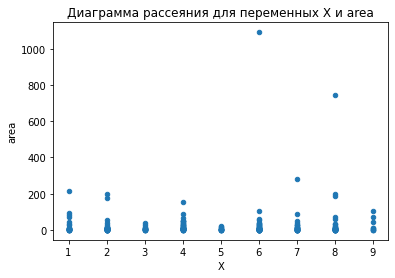

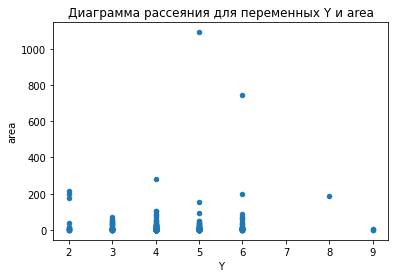

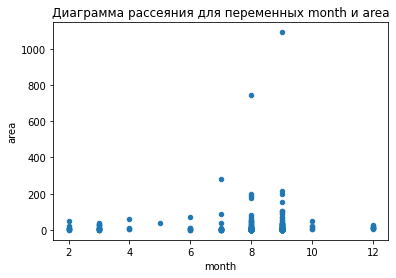

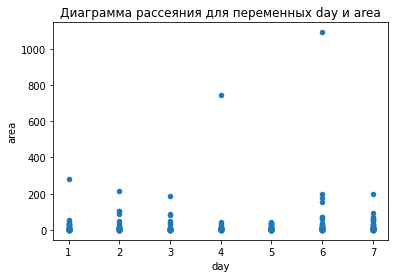

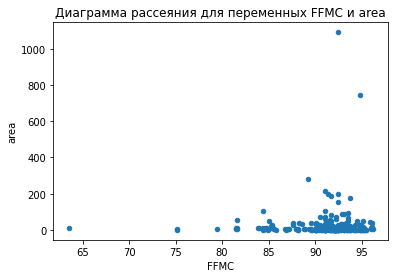

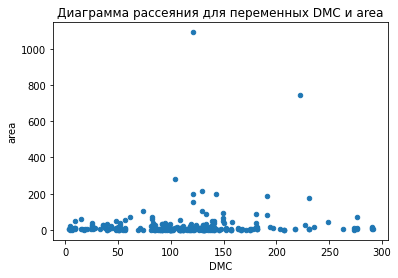

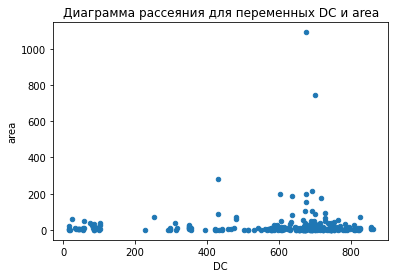

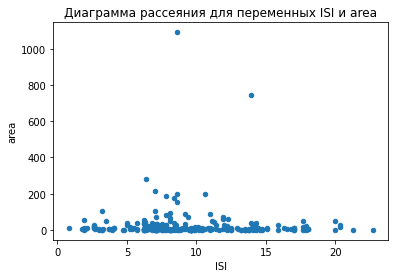

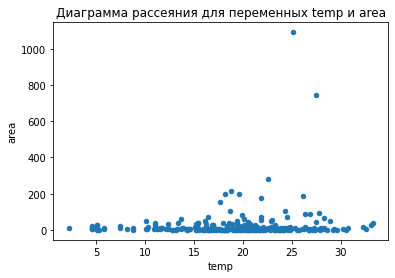

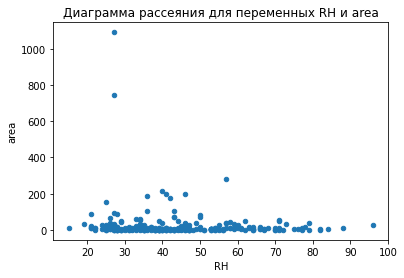

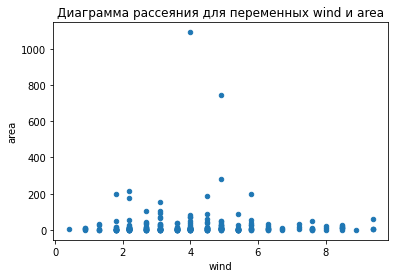

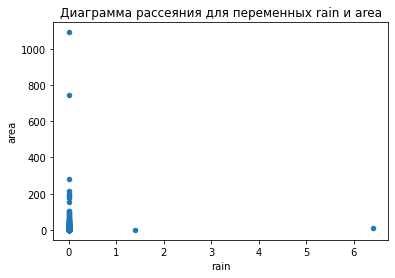

In [11]:
for i in columns_ind:
  df.plot(kind = 'scatter', x = i, y = df.columns[-1], title = 'Диаграмма рассеяния для переменных ' + i + ' и ' + df.columns[-1])

In [ ]:
# Поскольку описание данных предлагает использование логарифма переменной 'area', попробуем его использовать.
# Это также поможет уменьшить влияние нескольких выбросов на диаграммах рассеяния.

In [12]:
df['ln_area'] = np.log(df['area'])
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,ln_area
138,9,9,7,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,-1.021651
139,1,4,9,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,-0.843970
140,2,5,9,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,-0.755023
141,1,2,8,3,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,-0.597837
142,8,6,8,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,-0.494296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,8,5,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0.774727
510,6,5,8,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,-0.843970
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1.862529
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,3.994340


In [ ]:
# Диаграммы рассеяния для независимых переменных и логарифма зависимой переменной

In [13]:
columns_ind

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'],
      dtype='object')

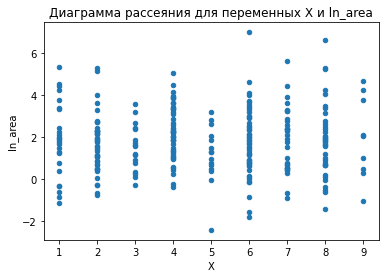

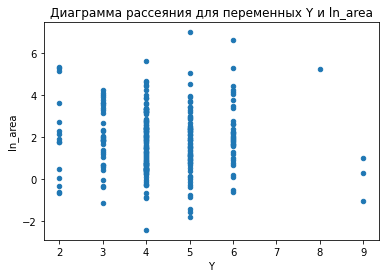

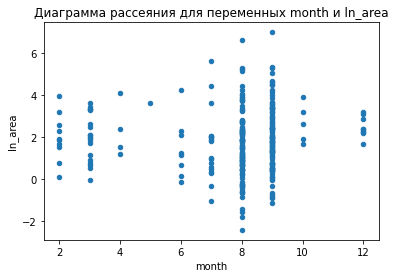

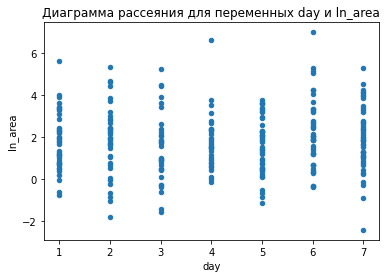

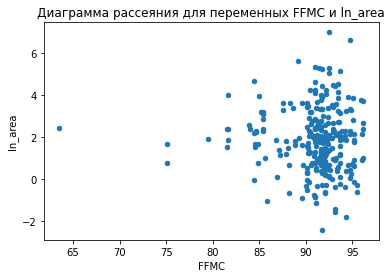

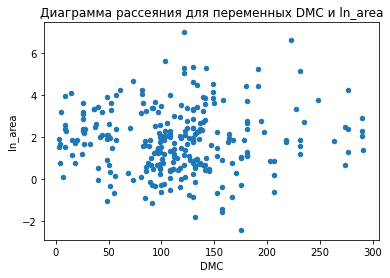

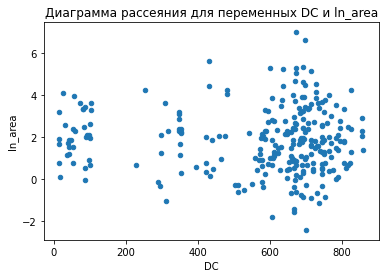

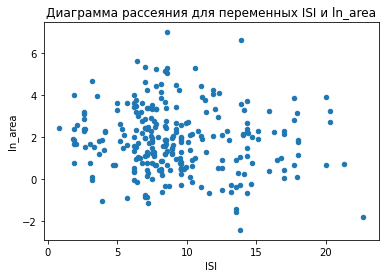

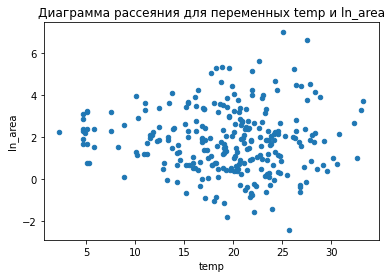

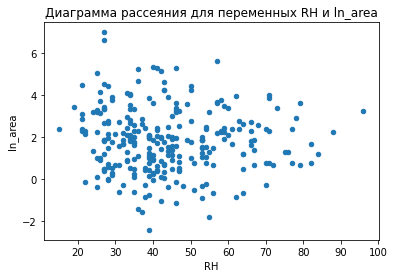

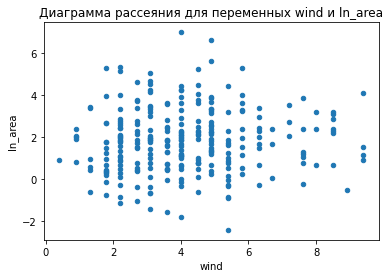

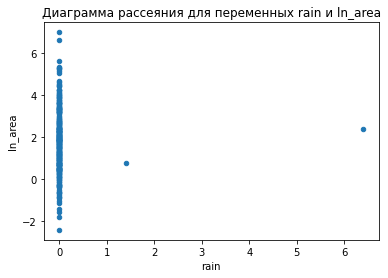

In [14]:
for i in columns_ind:
  df.plot(kind = 'scatter', x = i, y = df.columns[-1], title = 'Диаграмма рассеяния для переменных ' + i + ' и ' + df.columns[-1])

Действительно, можно видеть, что диаграммы рассеяния выглядят более наглядно и осмысленно, облака точек более сконцентрированы и больше предполагают наличие линейной зависимости от факторов.
Поэтому в дальнейшем будем оценивать зависимость для логарифма площади пожаров ('ln_area').

In [ ]:
# Поскольку есть 2 категориальных переменных, перекодируем их в бинарные переменные

In [15]:
# Чтобы названия колонок для бинарных переменных были более понятными, вернём им прежние значения

df['month'] = df['month'].map(dict(zip(valslist_month, keyslist_month)))
df['day'] = df['day'].map(dict(zip(valslist_day, keyslist_day)))

# Переставили списки в аргументах местами

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,ln_area
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,-1.021651
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,-0.843970
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,-0.755023
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,-0.597837
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,-0.494296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0.774727
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,-0.843970
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1.862529
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,3.994340


In [16]:
df_new = pd.concat((df, pd.get_dummies(df['month'], drop_first = True)), axis = 1)
df_new = pd.concat((df_new, pd.get_dummies(df['day'], drop_first = True)), axis = 1)

# drop_first = True, так как будем использовать модель с константой,
# поэтому нужно избежать попадания в dummy trap

df_new

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,ln_area,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,-1.021651,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,-0.843970,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,-0.755023,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,-0.597837,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,-0.494296,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0.774727,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,-0.843970,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1.862529,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,3.994340,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
df_new.index

# Подставим в DataFrame с константой эти индексы

Int64Index([138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
            ...
            498, 499, 503, 504, 505, 509, 510, 512, 513, 514],
           dtype='int64', length=270)

In [18]:
# Добавим константу в модель

df_temporary = pd.DataFrame(np.ones(shape = df_new.shape[0]), columns = ['const'], index = df_new.index)
print(df_temporary.head())

df_new = pd.concat((df_temporary, df_new), axis = 1)
df_new

     const
138    1.0
139    1.0
140    1.0
141    1.0
142    1.0


,const,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,ln_area,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed
138,1.0,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,-1.021651,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
139,1.0,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,-0.843970,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
140,1.0,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,-0.755023,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
141,1.0,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,-0.597837,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
142,1.0,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,-0.494296,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,1.0,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0.774727,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
510,1.0,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,-0.843970,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
512,1.0,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1.862529,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
513,1.0,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,3.994340,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [19]:
# Переставим для удобства зависимые переменные ('area' и 'ln_area') в первые 2 колонки,
# удалим исходные категориальные переменнные 'month' и 'day'

df_new = pd.concat((df_new[['area', 'ln_area']], df_new.drop(['area', 'ln_area'], axis = 1)), axis = 1)

df_new.drop(['month', 'day'], axis = 1, inplace = True)

df_new

,area,ln_area,const,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed
138,0.36,-1.021651,1.0,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
139,0.43,-0.843970,1.0,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
140,0.47,-0.755023,1.0,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
141,0.55,-0.597837,1.0,1,2,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
142,0.61,-0.494296,1.0,8,6,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,2.17,0.774727,1.0,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
510,0.43,-0.843970,1.0,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
512,6.44,1.862529,1.0,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
513,54.29,3.994340,1.0,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# NB: в качестве базовых значений при создании dummy-переменных выбраны april и friday соответственно (как первые идущие в алфавитном порядке среди значений своего столбца).

In [20]:
df_new.dtypes

area       float64
ln_area    float64
const      float64
X            int64
Y            int64
FFMC       float64
DMC        float64
DC         float64
ISI        float64
temp       float64
RH           int64
wind       float64
rain       float64
aug          uint8
dec          uint8
feb          uint8
jul          uint8
jun          uint8
mar          uint8
may          uint8
oct          uint8
sep          uint8
mon          uint8
sat          uint8
sun          uint8
thu          uint8
tue          uint8
wed          uint8
dtype: object

# Задание 2

Выберем среди признаков только те, которые, исходя из диаграмм рассеяния, могут быть хоть как-то связаны с зависимой переменной ln_area.

Выберем все признаки, кроме rain, потому что почти для всех наблюдений этот признак равен 0 (это может быть связано с тем, что в выборке были оставлены только наблюдения с ненулевой площадью пожаров).
Исходя из диаграмм рассеяния, для остальных признаков такой проблемы быть не должно.

Вместе с тем, из графиков можно предположить, что, поскольку для многих из них при проведении линии парной регрессии, скорее всего, коэффициент наклона будет примерно равен 0 (более того, в отдельности зависимость от части признаков *в отдельности* скорее не прослеживается), нет необходимости добавлять квадраты ни одной из переменных.
Также является не очевидным, почему здесь могут иметь значение переменые взаимодействия, поэтому также не будем их добавлять.

In [21]:
# Удалим переменную rain

df_new.drop(['rain'], axis = 1, inplace = True)

df_new

,area,ln_area,const,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed
138,0.36,-1.021651,1.0,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
139,0.43,-0.843970,1.0,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
140,0.47,-0.755023,1.0,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
141,0.55,-0.597837,1.0,1,2,95.5,99.9,513.3,13.2,23.3,31,4.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
142,0.61,-0.494296,1.0,8,6,90.1,108.0,529.8,12.5,21.2,51,8.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,2.17,0.774727,1.0,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
510,0.43,-0.843970,1.0,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
512,6.44,1.862529,1.0,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
513,54.29,3.994340,1.0,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Описательные статистики

In [22]:
df_new.describe()

,area,ln_area,const,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed
count,270.000000,270.000000,270.0,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,24.600185,1.844831,1.0,4.807407,4.366667,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.366667,0.033333,0.037037,0.066667,0.029630,0.070370,0.003704,0.018519,0.359259,0.144444,0.155556,0.174074,0.114815,0.133333,0.118519
std,86.501635,1.526712,0.0,2.383326,1.170740,3.709020,61.786520,229.981242,4.147350,6.179444,15.080059,1.884573,0.482789,0.179839,0.189203,0.249907,0.169878,0.256245,0.060858,0.135067,0.480674,0.352193,0.363107,0.379877,0.319390,0.340566,0.323821
min,0.090000,-2.407946,1.0,1.000000,2.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.140000,0.760806,1.0,3.000000,4.000000,90.325000,82.900000,486.500000,6.800000,16.125000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.370000,1.851598,1.0,5.000000,4.000000,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.422500,2.735823,1.0,7.000000,5.000000,92.975000,141.300000,721.325000,11.375000,23.400000,53.000000,4.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1090.840000,6.994703,1.0,9.000000,9.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Корреляционная матрица

In [23]:
df_new.corr()

,area,ln_area,const,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed
area,1.000000,0.533853,NaN,0.070316,0.050242,0.054323,0.089088,0.046735,0.002121,0.110293,-0.104846,0.002086,-0.012233,-0.024239,-0.027371,0.002928,-0.024666,-0.038934,0.009801,-0.007455,0.062577,-0.030857,0.131570,-0.022205,0.031553,-0.009820,-0.027685
ln_area,0.533853,1.000000,NaN,0.019832,-0.011719,-0.045433,0.029488,-0.029071,-0.110253,-0.034502,-0.049684,0.054650,-0.132139,0.077886,0.018031,-0.044661,-0.042227,0.028390,0.072231,0.073828,0.080168,-0.009786,0.110371,0.050036,-0.015464,0.005568,-0.086516
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X,0.070316,0.019832,NaN,1.000000,0.497039,-0.072176,-0.104614,-0.161281,-0.054832,-0.081485,0.064763,0.042686,-0.064400,-0.019659,0.032365,0.152708,0.105964,0.101406,-0.020694,0.115054,-0.156793,-0.002165,-0.003914,-0.053165,0.082877,0.013435,-0.023299
Y,0.050242,-0.011719,NaN,0.497039,1.000000,-0.021123,0.037533,-0.034065,-0.071683,0.031705,-0.039081,-0.037208,0.030912,0.100642,-0.061536,0.106730,-0.017446,0.012805,-0.071307,0.074446,-0.116045,-0.029752,-0.073457,0.014767,0.105715,-0.011188,0.061450
FFMC,0.054323,-0.045433,NaN,-0.072176,-0.021123,1.000000,0.480250,0.407638,0.704170,0.562256,-0.285990,-0.161384,0.337616,-0.304334,-0.442546,0.020802,0.021992,-0.088583,-0.023618,-0.036141,0.037105,-0.183923,0.073614,-0.068075,0.044698,-0.005670,0.108360
DMC,0.089088,0.029488,NaN,-0.104614,0.037533,0.480250,1.000000,0.668926,0.329656,0.501643,0.027861,-0.137897,0.454440,-0.266732,-0.342541,-0.022785,-0.087184,-0.338194,-0.088293,-0.161317,0.107853,-0.165709,0.061205,0.056548,-0.029903,0.033694,0.007219
DC,0.046735,-0.029071,NaN,-0.161281,-0.034065,0.407638,0.668926,1.000000,0.256826,0.495703,-0.082217,-0.237593,0.223099,-0.177661,-0.460252,-0.146037,-0.199680,-0.585196,-0.132050,0.067349,0.550626,-0.116829,-0.002089,-0.022035,-0.011836,0.051440,0.035858
ISI,0.002121,-0.110253,NaN,-0.054832,-0.071683,0.704170,0.329656,0.256826,1.000000,0.466027,-0.148804,0.072652,0.479140,-0.256154,-0.283162,-0.023625,0.023658,-0.117056,-0.051212,-0.058301,-0.156217,-0.203870,-0.001075,-0.078151,-0.031118,0.121666,0.134069
temp,0.110293,-0.034502,NaN,-0.081485,0.031705,0.562256,0.501643,0.495703,0.466027,1.000000,-0.497548,-0.320563,0.380797,-0.445239,-0.367277,0.154064,0.063782,-0.284333,-0.012960,-0.026526,0.038075,-0.122700,0.042303,0.054442,0.000293,0.050167,0.104675


Для выбранных признаков можно сделать следующие предположения о коэффициентах при них: для X и Y коэффициенты дожны быть нулевыми или положительными (исходя из диаграмм рассеяния) (так как это координаты, дать здесь содержательную интерпретацию затруднительно). Поскольку для month в качестве базовой выбрана dummy-переменная для апреля, коэффициенты при остальных месяцах показывают разницу во влиянии между апрелем и этими месяцами, поэтому можно предполагать, что для летних месяцев коэффициенты должны быть больше 0, для весенних и осенних месяцев - около нуля, для зимних месяцев - меньше нуля, так как этот датасет использует данные для Португалии, для неё, как для страны в Северном полушарии, самые жаркие месяцы должны быть летом. Для day базовым днём выбрана пятница, поэтому можно предполагать, что по сравнению с ней влияние дня недели будет больше в выходные и меньше в другие будние дни (соответственно поожительные и отрицательные коэффициенты для таких дней) на том основании, что причина многих пожаров - человеческий фактор, в будние дни больше людей находится на работе, а не на природе, в выходные - наоборот, а пятница занимает здесь "промежуточное положение". Что касается погодных индексов FFMC, DMC, DC, ISI, исходя из их значения (см. https://www.researchgate.net/profile/Mike_Flannigan/publication/262993519_Fire_weather_index_components_for_large_fires_in_the_Canadian_boreal_forest/links/53ff78a70cf2194bc29a82d2/Fire-weather-index-components-for-large-fires-in-the-Canadian-boreal-forest.pdf, p. 392) можно преположить, что коэффициенты при них должны быть положительны, однако такая закономерность не наблюдается на диаграммах рассеяния (об этом также говорят близкие к 0 значения корреляций с зависимой переменной в корреляционной матрице). Для температуры и влажности скорее можно предполагать, что коэффициент будет положительным и отрицательным соответственно (потому что при большей температуре легче воспламеняются потенциально горючие вещества, при большей влажности - наоборот), однако диаграммы рассеяния и значения в корреляционной матрице не подтверждают эти предположения, говоря скорее об отсутствии зависимости от этих факторов (соответственно, нулевых коэффициентах) *в отдельности*. Для скорости ветра можно предполагать, что зависимость будет положительной, потому что ветер способствует распространению пламени при пожаре, однако на диаграмме рассеяния такая зависимость не прослеживается; на основе диаграммы скорее можно предположить, что коэффициент при wind будет примерно равен 0, поэтому не значим.

Зафиксируем здесь и далее для всей работы уровень значимости 5% ($ \alpha = 0.05 $).

In [24]:
alpha = 0.05

In [ ]:
# Тест на нормальность данных

In [25]:
from scipy.stats import shapiro

In [ ]:
# H_0: данные взяты из нормального распределения

In [26]:
for i in df_new.columns:
  p_value = shapiro(df_new[i])[1]
  if p_value < alpha:
    print('p-value: ', p_value, '--> H_0 о нормальности распределения для', i, 'отвергается')
  else:
    print('p-value: ', p_value, '--> H_0 о нормальности распределения для', i, 'не отвергается')

p-value:  9.299815411050252e-32 --> H_0 о нормальности распределения для area отвергается
p-value:  0.24017640948295593 --> H_0 о нормальности распределения для ln_area не отвергается
p-value:  1.0 --> H_0 о нормальности распределения для const не отвергается
p-value:  7.642524391116012e-10 --> H_0 о нормальности распределения для X отвергается
p-value:  1.5662824769807626e-12 --> H_0 о нормальности распределения для Y отвергается
p-value:  1.5375162767162289e-18 --> H_0 о нормальности распределения для FFMC отвергается
p-value:  1.8200890963271377e-06 --> H_0 о нормальности распределения для DMC отвергается
p-value:  2.1773135764765725e-17 --> H_0 о нормальности распределения для DC отвергается
p-value:  4.600660759024322e-07 --> H_0 о нормальности распределения для ISI отвергается
p-value:  4.0208313293987885e-05 --> H_0 о нормальности распределения для temp отвергается
p-value:  1.3392632070008403e-07 --> H_0 о нормальности распределения для RH отвергается
p-value:  2.00296739194527

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [ ]:
# Как можно видеть, почти для всех переменных в датасете гипотеза о нормальности распределения,
# из которого они взяты, отвергается.

In [ ]:
# Гистограммы и "ящики с усами"

In [27]:
import warnings

In [28]:
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

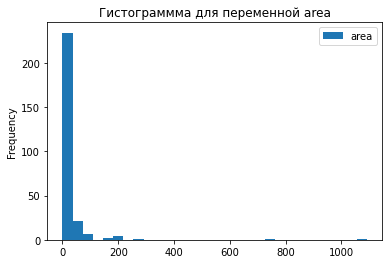

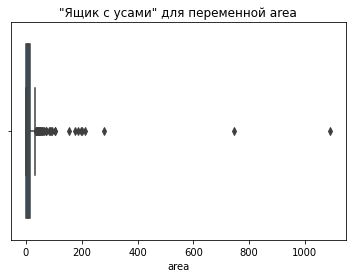

<Figure size 432x288 with 0 Axes>

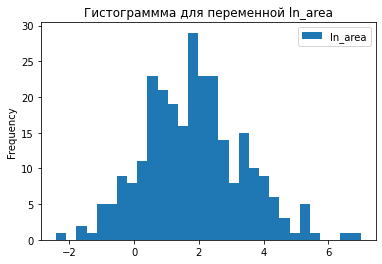

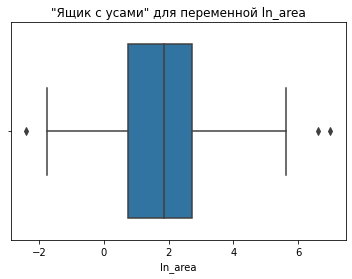

<Figure size 432x288 with 0 Axes>

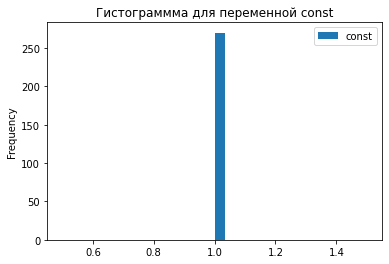

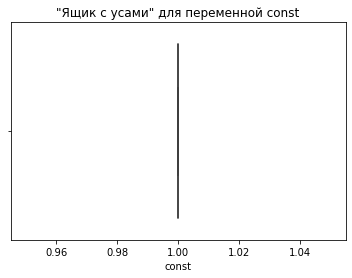

<Figure size 432x288 with 0 Axes>

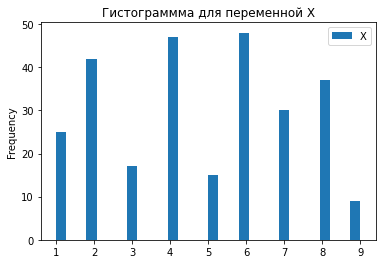

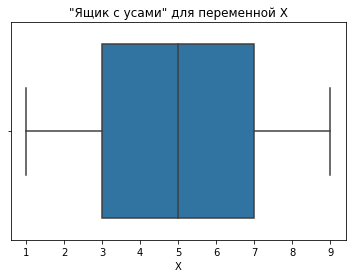

<Figure size 432x288 with 0 Axes>

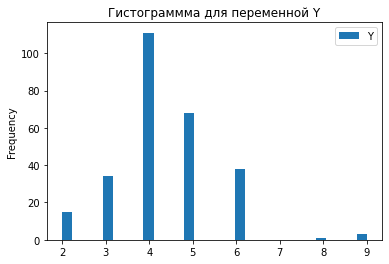

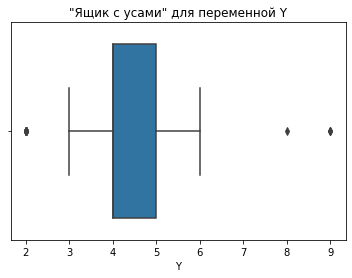

<Figure size 432x288 with 0 Axes>

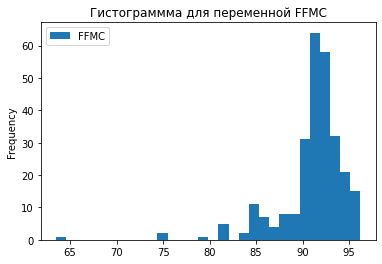

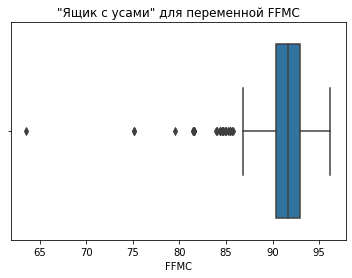

<Figure size 432x288 with 0 Axes>

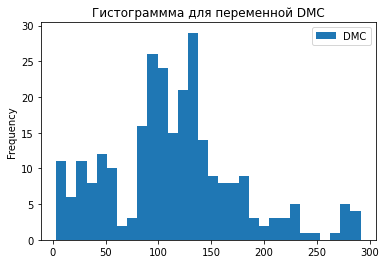

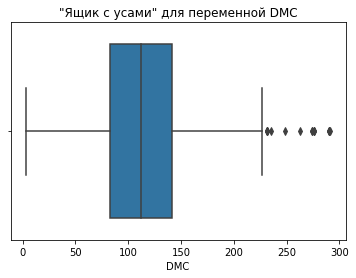

<Figure size 432x288 with 0 Axes>

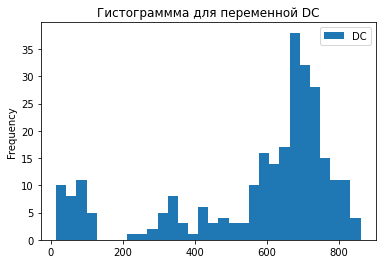

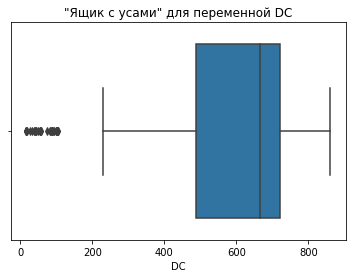

<Figure size 432x288 with 0 Axes>

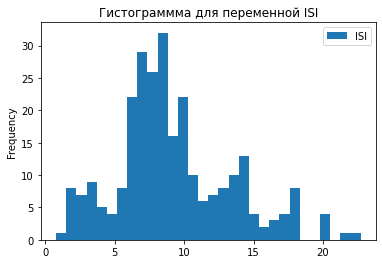

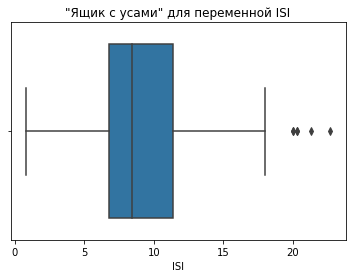

<Figure size 432x288 with 0 Axes>

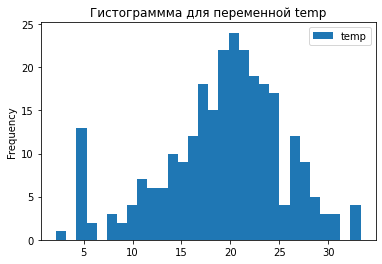

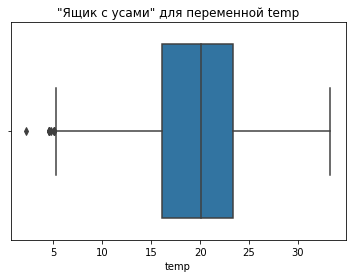

<Figure size 432x288 with 0 Axes>

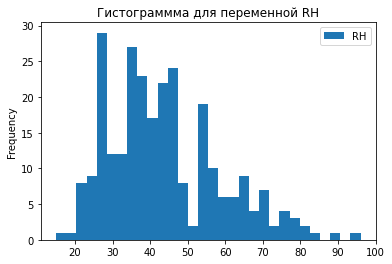

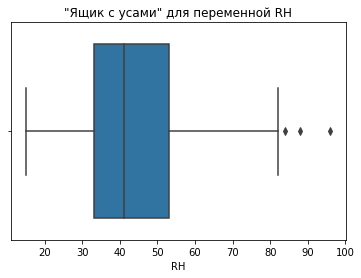

<Figure size 432x288 with 0 Axes>

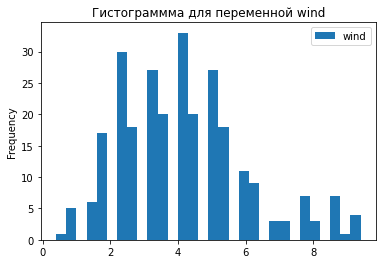

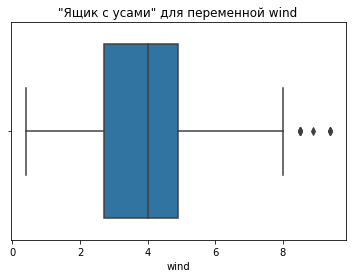

<Figure size 432x288 with 0 Axes>

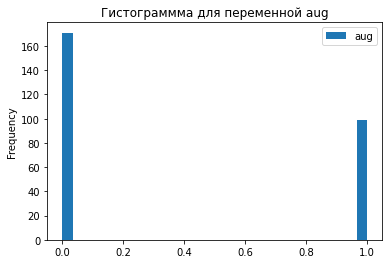

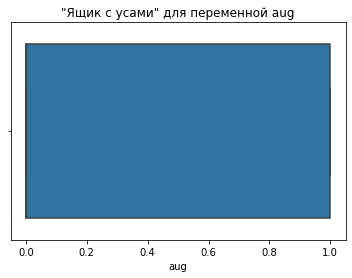

<Figure size 432x288 with 0 Axes>

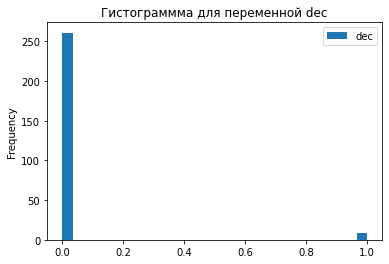

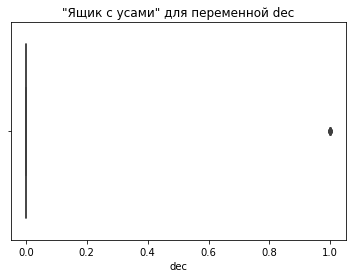

<Figure size 432x288 with 0 Axes>

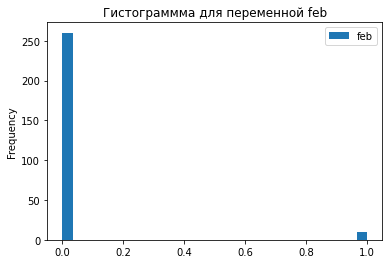

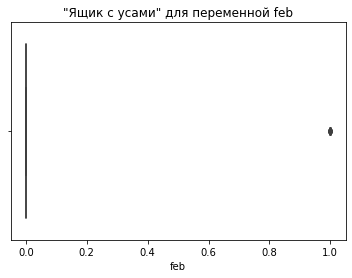

<Figure size 432x288 with 0 Axes>

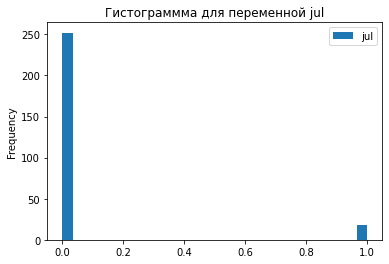

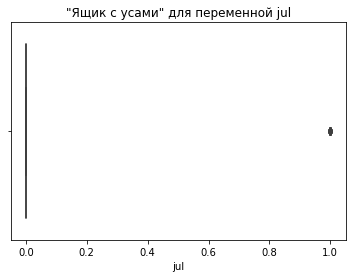

<Figure size 432x288 with 0 Axes>

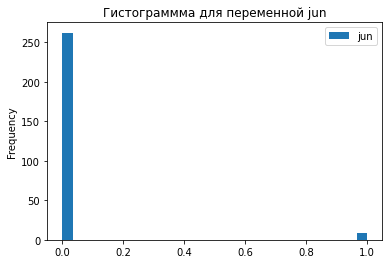

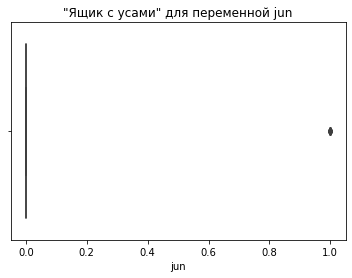

<Figure size 432x288 with 0 Axes>

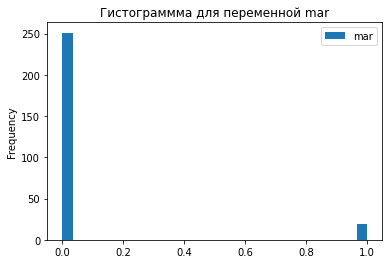

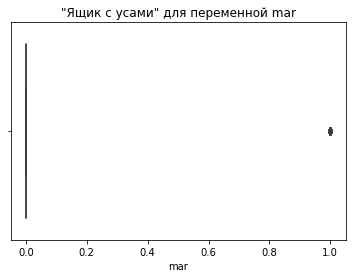

<Figure size 432x288 with 0 Axes>

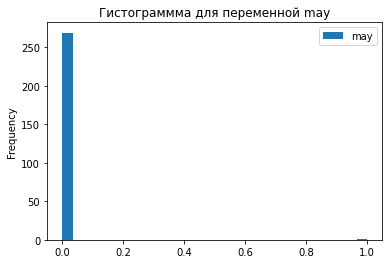

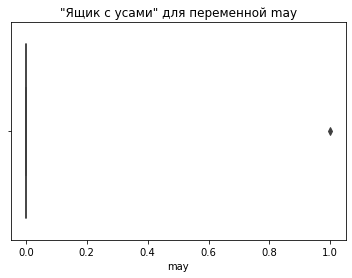

<Figure size 432x288 with 0 Axes>

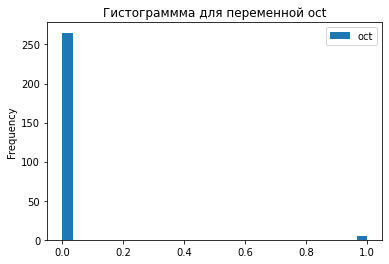

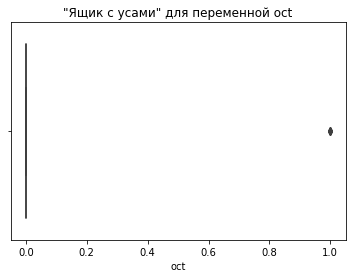

<Figure size 432x288 with 0 Axes>

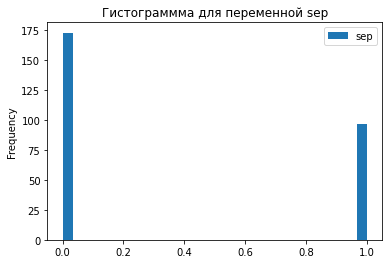

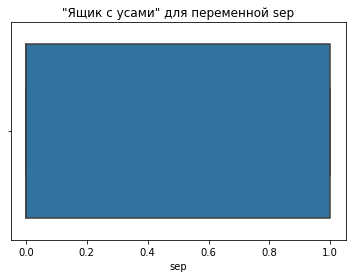

<Figure size 432x288 with 0 Axes>

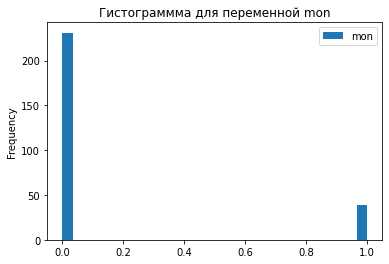

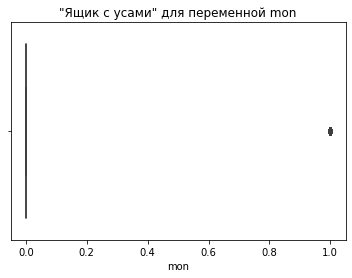

<Figure size 432x288 with 0 Axes>

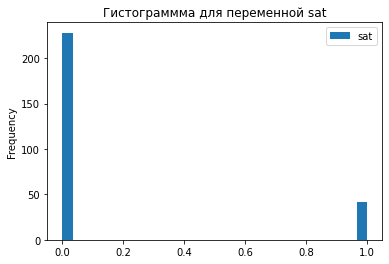

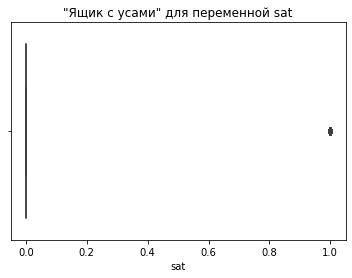

<Figure size 432x288 with 0 Axes>

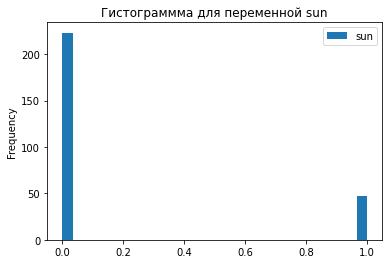

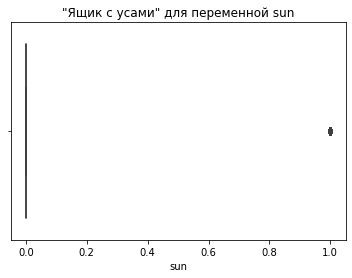

<Figure size 432x288 with 0 Axes>

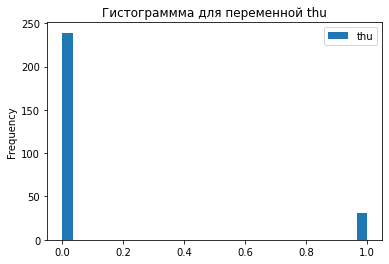

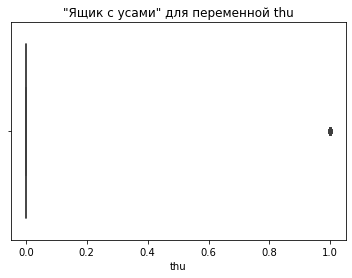

<Figure size 432x288 with 0 Axes>

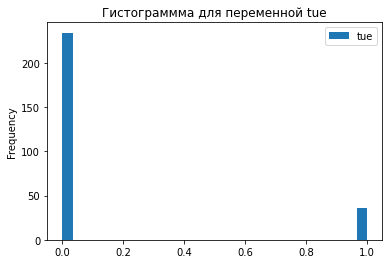

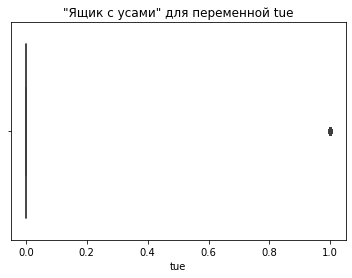

<Figure size 432x288 with 0 Axes>

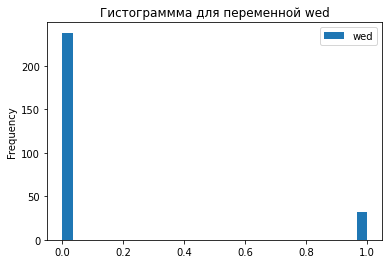

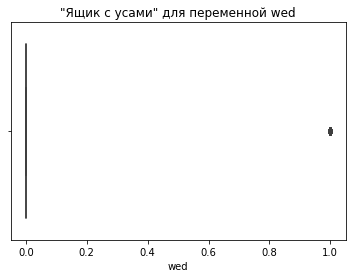

In [29]:
for i in df_new.columns:
  plt.figure()
  df_new.plot(kind = 'hist', y = i, bins = 30, title = 'Гистограммма для переменной ' + i)
  plt.figure()
  sns.boxplot(x = df_new[i])
  plt.title('"Ящик с усами" для переменной ' + i)

In [30]:
warnings.filterwarnings('default')

Интерпретация графиков.

Гистограммы в целом подтверждают результаты теста Шапиро-Уилка о том, что только данные для переменной ln_area можгли быть взяты из нормального распределения (если не считать константу нормально распределённой случайной величиной с нулевой дисперсией): для остальных переменных либо почти все значения сконцентрированы около одного значения с небольшим односторонним "хвостом" (например, как в случае переменной area), либо сравнительно близки равномерному распределению (как для переменной X), либо имеют один или несколько тяжёлых "хвостов" с несколькими модами распределения (например, как для переменных Y, четырёх индексов, характеризующих условия для распространения пожара, температуры, влажности и скорости ветра); для dummy-переменных гистограммы иллюстрируют, что, как и следовало ожидать, число значений "0" заметно больше числа значений "1".

"Ящики с усами" используются для определения выбросов: к ним относят наблюдения, лежащие вне "усов". Для имеющихся данных можно говорить о том, что аномалии есть в большом количестве для переменных area, FFMC, DMC, DC, temp и в небольшом количестве для переменных ln_area, ISI, RH, wind.

"Ящики с усами" для dummy-переменных выглядит неуместным интепретировать как индикатор наличия аномалий, потому что более редки значения 1 в таком случае рассматривались бы как аномалии, тогда их удаление было бы равносильно удалению этой dummy-переменной вместе с бесполезным удалением части наблюдений.

В данном случае выглядит целесообразным, несмотря на обнаружение аномалий для большого числа переменных, не удалять их, так как тогда в выборке останется слишком мало наблюдений для того, чтобы можно было доверять полученным оценкам; удаление слишком большого числа наблюдений сделает выборку не репрезентативной, поэтому оценки параметров могут стать смещёнными и не состоятельными.

# Задание 3

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
# Создадим отдельно DataFrame-ы  с независимыми переменными и с зависимыми переменными
# (будем оценивать регрессии для ln_area, переменная area будет оставлена для возможного будущего
# сопоставления результатов в исходных единицах)

In [32]:
df_ind = df_new[df_new.columns[2:]].copy()
df_dep = df_new[df_new.columns[:2]].copy()

df_ind, df_dep

(     const  X  Y  FFMC    DMC     DC   ISI  ...  sep  mon  sat  sun  thu  tue  wed
 138    1.0  9  9  85.8   48.3  313.4   3.9  ...    0    0    0    0    0    1    0
 139    1.0  1  4  91.0  129.5  692.6   7.0  ...    1    0    0    0    0    1    0
 140    1.0  2  5  90.9  126.5  686.5   7.0  ...    1    1    0    0    0    0    0
 141    1.0  1  2  95.5   99.9  513.3  13.2  ...    0    0    0    0    0    0    1
 142    1.0  8  6  90.1  108.0  529.8  12.5  ...    0    0    0    0    0    0    0
 ..     ... .. ..   ...    ...    ...   ...  ...  ...  ...  ...  ...  ...  ...  ...
 509    1.0  5  4  91.0  166.9  752.6   7.1  ...    0    0    0    0    0    0    0
 510    1.0  6  5  91.0  166.9  752.6   7.1  ...    0    0    0    0    0    0    0
 512    1.0  4  3  81.6   56.7  665.6   1.9  ...    0    0    0    1    0    0    0
 513    1.0  2  4  81.6   56.7  665.6   1.9  ...    0    0    0    1    0    0    0
 514    1.0  7  4  81.6   56.7  665.6   1.9  ...    0    0    0    1    0   

In [ ]:
# Рассчитаем VIF для каждой объясняющей переменной

In [33]:
vif_list = {}

for i in range(len(df_ind.columns)):
  vif_list[df_ind.columns[i]] = vif(exog = df_ind.values, exog_idx = i)

vif_list_inverse = dict(zip(vif_list.values(), vif_list.keys()))
# Поменяли местами ключи и значения
print(vif_list_inverse)
print('')

print(vif_list)
vif_list

{1839.668091716975: 'const', 1.517042121927648: 'X', 1.5123784846320076: 'Y', 3.0554039570175093: 'FFMC', 3.665712470360829: 'DMC', 27.255258804031595: 'DC', 2.8449976543947604: 'ISI', 5.306352361760801: 'temp', 2.5872706444789912: 'RH', 1.448595356956217: 'wind', 51.79405072567812: 'aug', 5.244180153235691: 'dec', 3.572335532201767: 'feb', 10.091470808217295: 'jul', 4.131055491029627: 'jun', 5.722777348500291: 'mar', 1.3372570979034337: 'may', 6.050275174399481: 'oct', 64.76074242138813: 'sep', 1.9275463793605891: 'mon', 1.8379707861383934: 'sat', 1.9506038740391805: 'sun', 1.7191483486625598: 'thu', 1.7022729761844135: 'tue', 1.7233148054780283: 'wed'}

{'const': 1839.668091716975, 'X': 1.517042121927648, 'Y': 1.5123784846320076, 'FFMC': 3.0554039570175093, 'DMC': 3.665712470360829, 'DC': 27.255258804031595, 'ISI': 2.8449976543947604, 'temp': 5.306352361760801, 'RH': 2.5872706444789912, 'wind': 1.448595356956217, 'aug': 51.79405072567812, 'dec': 5.244180153235691, 'feb': 3.5723355322

{'DC': 27.255258804031595,
 'DMC': 3.665712470360829,
 'FFMC': 3.0554039570175093,
 'ISI': 2.8449976543947604,
 'RH': 2.5872706444789912,
 'X': 1.517042121927648,
 'Y': 1.5123784846320076,
 'aug': 51.79405072567812,
 'const': 1839.668091716975,
 'dec': 5.244180153235691,
 'feb': 3.572335532201767,
 'jul': 10.091470808217295,
 'jun': 4.131055491029627,
 'mar': 5.722777348500291,
 'may': 1.3372570979034337,
 'mon': 1.9275463793605891,
 'oct': 6.050275174399481,
 'sat': 1.8379707861383934,
 'sep': 64.76074242138813,
 'sun': 1.9506038740391805,
 'temp': 5.306352361760801,
 'thu': 1.7191483486625598,
 'tue': 1.7022729761844135,
 'wed': 1.7233148054780283,
 'wind': 1.448595356956217}

In [34]:
sorted_vif = np.sort(list(vif_list_inverse.keys()))[::-1]

print('Список переменных с VIF больше 10:')
# Будем считать, что мультиколлинеарность, ассоциированная с конкретным фактором, есть,
# если для него VIF > 10

for i in sorted_vif:
  if i > 10:
    print(vif_list_inverse[i])

Список переменных с VIF больше 10:
const
sep
aug
DC
jul


In [ ]:
# Рассчитаем condition number (CN)

In [35]:
X = df_ind.values
eigs = np.linalg.eigvals(np.dot(X.T, X))
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

27310.869824061556


Как можно видеть, большие значения VIF для нескольких переменных и большое значение Conditional Number (CN) (существенно превосходящее 30) свидетельствуют о наличии практической мультиколлинеарности.

Одним из решений проблемы мультиколлинеарности является применение метода пошагового исключения переменных. Используем его.

In [36]:
import statsmodels.formula.api as sm

In [37]:
print(df_new.columns)
print(list(df_new.columns))

Index(['area', 'ln_area', 'const', 'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI',
       'temp', 'RH', 'wind', 'aug', 'dec', 'feb', 'jul', 'jun', 'mar', 'may',
       'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')
['area', 'ln_area', 'const', 'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'aug', 'dec', 'feb', 'jul', 'jun', 'mar', 'may', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']


In [38]:
# based on https://stackoverflow.com/questions/45740920/statsmodels-how-can-i-get-statsmodel-to-return-the-pvalue-of-an-ols-object

# sigLevel = 0.05
# X_opt = X[:,[0,1,2,3,4,5]]
# X_opt = X.copy()
# regressor_OLS = sm.ols(endog = y, exog = X_opt).fit()


columns_ind = list(df_new.columns[3:]).copy() # [3:], а не [2:], т. к. модель сама добавляет константу
print(columns_ind)
print(len(columns_ind))

regressor_OLS = sm.ols('ln_area ~ ' + (' + ').join(columns_ind), data = df_new).fit()
pVals = regressor_OLS.pvalues
# print(pVals)

while pVals[np.argmax(pVals)] > alpha:
  print('Удаляемая переменная:', columns_ind[np.argmax(pVals) - 1])
  del columns_ind[np.argmax(pVals) - 1]
  # Чтобы учесть, что модель сама добавляет константу (Intercept) на первое место -->
  # увеличивает остальные индексы на 1

  regressor_OLS = sm.ols('ln_area ~ ' + (' + ').join(columns_ind), data = df_new).fit()
  pVals = regressor_OLS.pvalues
  # print(pVals)

regressor_OLS.summary()

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'aug', 'dec', 'feb', 'jul', 'jun', 'mar', 'may', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']
24
Удаляемая переменная: mon
Удаляемая переменная: RH
Удаляемая переменная: jul
Удаляемая переменная: wed
Удаляемая переменная: FFMC
Удаляемая переменная: feb
Удаляемая переменная: mar
Удаляемая переменная: jun
Удаляемая переменная: thu
Удаляемая переменная: wind
Удаляемая переменная: ISI
Удаляемая переменная: Y
Удаляемая переменная: X
Удаляемая переменная: tue
Удаляемая переменная: may
Удаляемая переменная: aug
Удаляемая переменная: temp
Удаляемая переменная: sun
Удаляемая переменная: sat


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_area   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     4.197
Date:                Sat, 20 Jun 2020   Prob (F-statistic):            0.00109
Time:                        06:58:31   Log-Likelihood:                -486.53
No. Observations:                 270   AIC:                             985.1
Df Residuals:                     264   BIC:                             1007.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0202      0.257      7.853      0.000       1.514       2.527
DMC            0.0086      0.002      3.519      0.001       0.004       0.013
DC            -0.0028      0.001     -3.698      0.000      -0.004      -0.001
dec            1.2275      0.533      2.305      0.022       0.179       2.276
oct            2.2034      0.746      2.954      0.003       0.735       3.672
sep            1.0044      0.267      3.755      0.000       0.478       1.531
==============================================================================
Omnibus:                        8.430   Durbin-Watson:                   1.028
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.302
Skew:                           0.400   Prob(JB):                       0.0157
Kurtosis:                       3.312   Cond. No.                     5.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
columns_ind

['DMC', 'DC', 'dec', 'oct', 'sep']

Поскольку метод пошагового исключения не является идеальным, так как может удалить достаточно важные факторы, которые на определённом шаге будут иметь наибольшее p-value, однако оставить менее важные, произведём следующие действия: удалим переменную DC как достаточно сильно коррелирующую с DMC (коэффициент выборочной корреляции равен 0.668926) и вернём переменные temp и wind как предикторы, которые из соображений о механизме появления и распространения пожара должны быть важными объясняющими переменным для площади пожаров.
Такая комбинация факторов всё ещё даёт высокий CN, поэтому после некоторого числа попыток подбора факторов оставим следующий их набор:

In [40]:
del columns_ind[columns_ind.index('DC')]
del columns_ind[columns_ind.index('dec')]
del columns_ind[columns_ind.index('oct')]
del columns_ind[columns_ind.index('DMC')]
columns_ind.extend(['wind', 'aug', 'RH', 'ISI', 'sat'])

columns_ind

['sep', 'wind', 'aug', 'RH', 'ISI', 'sat']

In [41]:
regressor_OLS = sm.ols('ln_area ~ ' + (' + ').join(columns_ind), data = df_new).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_area   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.008
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0649
Time:                        06:58:50   Log-Likelihood:                -490.81
No. Observations:                 270   AIC:                             995.6
Df Residuals:                     263   BIC:                             1021.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0859      0.438      4.760      0.000       1.223       2.949
sep            0.1476      0.245      0.601      0.548      -0.336       0.631
wind           0.0738      0.052      1.427      0.155      -0.028       0.176
aug           -0.2116      0.271     -0.782      0.435      -0.744       0.321
RH            -0.0069      0.006     -1.099      0.273      -0.019       0.005
ISI           -0.0322      0.026     -1.224      0.222      -0.084       0.020
sat            0.5036      0.255      1.978      0.049       0.002       1.005
==============================================================================
Omnibus:                        5.168   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                4.914
Skew:                           0.323   Prob(JB):                       0.0857
Kurtosis:                       3.142   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Для выбранного набора факторов CN всё ещё высокий (больше 30), что, согласно лекциям, свидетельствует в пользу мультиколлинеарности, однако дальнейшее уменьшение CN возможно, скорее всего, только за счёт дальнейшего уменьшения числа факторов, что ещё сильнее ухудшит качество модели; кромер того, sm.ols перестаёт выдавать предупреждение о высокой мультиколлинеарности при CN < 1000, поэтому оставим выбранный набор факторов именно в таком виде, полагая, что проблема практической мультиколлинеарности решена.

# Задание 4

In [42]:
# Оценим линейную модель, используя выбранные факторы

regressor_OLS = sm.ols('ln_area ~ ' + (' + ').join(columns_ind), data = df_new).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_area   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.008
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0649
Time:                        06:59:08   Log-Likelihood:                -490.81
No. Observations:                 270   AIC:                             995.6
Df Residuals:                     263   BIC:                             1021.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0859      0.438      4.760      0.000       1.223       2.949
sep            0.1476      0.245      0.601      0.548      -0.336       0.631
wind           0.0738      0.052      1.427      0.155      -0.028       0.176
aug           -0.2116      0.271     -0.782      0.435      -0.744       0.321
RH            -0.0069      0.006     -1.099      0.273      -0.019       0.005
ISI           -0.0322      0.026     -1.224      0.222      -0.084       0.020
sat            0.5036      0.255      1.978      0.049       0.002       1.005
==============================================================================
Omnibus:                        5.168   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                4.914
Skew:                           0.323   Prob(JB):                       0.0857
Kurtosis:                       3.142   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

В данном случае регрессия обладает некоторыми существенными недостатками (высоким p-value для F-статистики, делающим модель не значимой в целом при уровне значимости 5%, и только двумя значимыми коэффициентами), но в целях выполнения задания (не требующего выполнения всех требований к регрессии) будем работать с именно такой спецификацией модели.

Коэффициент для сентября (sep) получился положительным (и не значимым), хотя ранее предполагалось, что он будет близок к 0, что можно объяснить тем, что поскольку из регрессии были удалены многие dummy-переменные, соответствующие другим месяцам, содержательная интерпретация коэффициента (изначально предполагавшая понимание коэффициента как показателя разности влияния между базовым месяцем (апрелем) и рассматриваемым месяцем) могла поменяться.

Этим же можно объяснить и то, что коэффициент при dummy-переменной для августа отрицателен, хотя предполагалось, что он буе положительным.

Для wind коэффициент положителен (как было предположено исходя из соображений о распространении пожаров), но не значим (как было предположено на основе диаграммы рассеяния wind и ln_area).

Для относительной влажности (RH) коэффициент, как и предполагалось, отрицателен, однако не значим, что было предположено на основе диаграммы рассеяния для RH и ln_area.

Коэффициент для ISI (одного из индексов, характеризующих благоприятность условий для распространения пожара) оказался отрицательным, хотя ранее было предположено, что он будет положительным, как и для других индексов. В то же время, коэффициент не значим (т. е. статистически не отличен от 0), о чём было сделано предположено на основе диаграммы рассеяния, а отрицательность коэффициента может быть связана с тем, что ISI имеет с ln_area отрицательную корреляцию, равную -0.110253, что не противоречит полученному результату и скоре говорит о неправльности изначального предположения о знаке коэффициента для этого фактора.

Наконец, коэффициент для sat, как было предположено, положителен (и, кроме того, значим), что не противоречит предположению о том, что по выходным площадь пожаров больше, потому что больше людей оказывается на природе.

Проверим нормальность остатков модели.

In [43]:
# Получим остатки модели

print(regressor_OLS.fittedvalues)
print('')

print(regressor_OLS.fittedvalues + regressor_OLS.resid - df_new['ln_area'])
print('')

regressor_OLS.resid

138    1.868971
139    1.907355
140    1.870941
141    1.566330
142    1.775149
         ...   
509    1.715107
510    1.615068
512    1.790969
513    1.749998
514    1.823288
Length: 270, dtype: float64

138    0.000000e+00
139    2.220446e-16
140   -1.110223e-16
141   -2.220446e-16
142    1.110223e-16
           ...     
509    0.000000e+00
510    0.000000e+00
512    0.000000e+00
513    0.000000e+00
514    0.000000e+00
Length: 270, dtype: float64



138   -2.890623
139   -2.751325
140   -2.625964
141   -2.164167
142   -2.269446
         ...   
509   -0.940379
510   -2.459038
512    0.071559
513    2.244342
514    0.589048
Length: 270, dtype: float64

In [44]:
df_new['resid1'] = regressor_OLS.resid.copy()

In [ ]:
# Применим тест Шапиро-Уилка, тест Колмогорова-Смирнова и qqplot.

In [45]:
# Тест Шапиро-Уилка

p_value = shapiro(df_new['resid1'])[1]
if p_value < alpha:
  print('p-value: ', p_value, '--> H_0 о нормальности распределения для', 'остатков модели', 'отвергается')
else:
  print('p-value: ', p_value, '--> H_0 о нормальности распределения для', 'остатков модели', 'не отвергается')

p-value:  0.1449291706085205 --> H_0 о нормальности распределения для остатков модели не отвергается


In [46]:
from scipy.stats import kstest # Тест Колмогорова-Смирнова

In [47]:
# Тест Колмогорова-Смирнова

p_value = kstest(df_new['resid1'], 'norm')[1]
if p_value < alpha:
  print('p-value: ', p_value, '--> H_0 о нормальности распределения для', 'остатков модели', 'отвергается')
else:
  print('p-value: ', p_value, '--> H_0 о нормальности распределения для', 'остатков модели', 'не отвергается')

p-value:  0.005644899257886937 --> H_0 о нормальности распределения для остатков модели отвергается


In [48]:
from statsmodels.api import qqplot

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


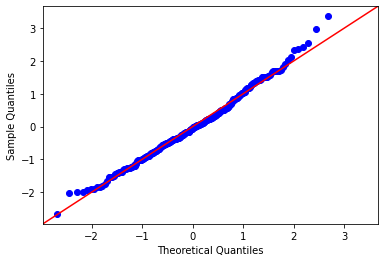

In [49]:
new_figure = qqplot(df_new['resid1'], line='45', fit='True')

Таким образом, разные тесты предлагают противоречивые результаты для проверки гипотезы о нормальности остатков оцененной регрессии.

Получим доверительные интервалы для коэффициентов регрессии с помощью бутстрапа.

In [50]:
columns_ind_list = ['Intercept']
columns_ind_list.extend(columns_ind)
columns_ind_list

['Intercept', 'sep', 'wind', 'aug', 'RH', 'ISI', 'sat']

In [51]:
df_coeffs = pd.DataFrame(columns = columns_ind_list)
df_coeffs.head()

,Intercept,sep,wind,aug,RH,ISI,sat


In [52]:
df_new.index

Int64Index([138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
            ...
            498, 499, 503, 504, 505, 509, 510, 512, 513, 514],
           dtype='int64', length=270)

In [53]:
regressor_OLS.params, regressor_OLS.params.values

(Intercept    2.085917
 sep          0.147551
 wind         0.073752
 aug         -0.211610
 RH          -0.006913
 ISI         -0.032240
 sat          0.503637
 dtype: float64,
 array([ 2.08591672,  0.14755054,  0.07375238, -0.21161029, -0.00691292,
        -0.03223955,  0.50363698]))

In [54]:
pd.DataFrame(regressor_OLS.params).T

,Intercept,sep,wind,aug,RH,ISI,sat
0,2.085917,0.147551,0.073752,-0.21161,-0.006913,-0.03224,0.503637


In [ ]:
# Реализация бутстрапа

In [55]:
%%time

np.random.seed(10)

B = 10000

for i in range(B):
  if i % 500 == 0:
    print('Step', i, 'is starting')
  
  observations = np.random.choice(a = df_new.index, size = (df_new.shape[0],), replace = True)
  # replace = True отвечает за то, чтобы генерировалась выборка с возвращением
  df_temporary = df_new.loc[observations]
  # print(df_temporary)

  regressor_OLS = sm.ols('ln_area ~ ' + (' + ').join(columns_ind), data = df_temporary).fit()
  # regressor_OLS.params.values
  df_coeffs = pd.concat((df_coeffs, pd.DataFrame(regressor_OLS.params).T), axis = 0)
  # print(df_coeffs)

print(df_coeffs.shape)

Step 0 is starting
Step 500 is starting
Step 1000 is starting
Step 1500 is starting
Step 2000 is starting
Step 2500 is starting
Step 3000 is starting
Step 3500 is starting
Step 4000 is starting
Step 4500 is starting
Step 5000 is starting
Step 5500 is starting
Step 6000 is starting
Step 6500 is starting
Step 7000 is starting
Step 7500 is starting
Step 8000 is starting
Step 8500 is starting
Step 9000 is starting
Step 9500 is starting
(10000, 7)
CPU times: user 4min 12s, sys: 367 ms, total: 4min 12s
Wall time: 4min 13s


In [56]:
df_coeffs

,Intercept,sep,wind,aug,RH,ISI,sat
0,1.581880,0.154154,0.087817,0.055658,-0.000428,-0.016871,0.191821
0,2.422014,0.467389,0.011902,-0.077388,-0.008980,-0.046490,0.472808
0,1.646012,0.072278,0.062167,-0.213017,0.001389,-0.020077,0.441977
0,1.705558,0.137206,0.050931,-0.323608,-0.002186,-0.011463,0.999253
0,1.310490,0.198288,0.131335,0.100599,0.002252,-0.034545,0.419151
...,...,...,...,...,...,...,...
0,2.147228,0.094316,0.012034,-0.310230,-0.003793,-0.030062,0.922993
0,2.118982,0.708198,0.102685,0.112440,-0.010619,-0.062364,0.188993
0,1.880919,0.001991,0.057623,-0.696420,-0.006530,0.006610,0.206379
0,2.051716,0.241541,0.080634,-0.676517,-0.012136,0.004834,0.534772


In [57]:
# NB: уровень значимости alpha = 0.05

quantiles = np.percentile(df_coeffs, [(alpha / 2) * 100, (1 - alpha / 2) * 100], axis = 0)
quantiles.shape

(2, 7)

In [58]:
conf_int = pd.DataFrame(quantiles, columns = columns_ind_list)
conf_int

,Intercept,sep,wind,aug,RH,ISI,sat
0,1.310484,-0.285659,-0.013978,-0.715438,-0.018929,-0.080219,-0.035241
1,2.921921,0.593988,0.161944,0.294848,0.004085,0.016043,1.073813


In [59]:
# Эмпирические доверительные интервалы

for i in columns_ind_list:
  print('95%-й доверительный интервал для', i, ':', '[', conf_int[i][0], ';', conf_int[i][1], ']')

95%-й доверительный интервал для Intercept : [ 1.3104844112760903 ; 2.921921228349323 ]
95%-й доверительный интервал для sep : [ -0.2856589306167577 ; 0.5939877602758769 ]
95%-й доверительный интервал для wind : [ -0.013977542665699144 ; 0.16194410055719982 ]
95%-й доверительный интервал для aug : [ -0.7154380610841906 ; 0.2948476828264901 ]
95%-й доверительный интервал для RH : [ -0.018928896434924628 ; 0.004084670734114341 ]
95%-й доверительный интервал для ISI : [ -0.08021936927123949 ; 0.016043161109186473 ]
95%-й доверительный интервал для sat : [ -0.035241016428618176 ; 1.0738133666121454 ]


# Задание 5

In [60]:
# Новое наблюдение

new_obs = np.median(df_new, axis = 0)
new_obs = pd.DataFrame(new_obs).T

new_obs.columns = df_new.columns

new_obs

,area,ln_area,const,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed,resid1
0,6.37,1.851598,1.0,5.0,4.0,91.7,111.7,665.6,8.4,20.1,41.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.083631


In [61]:
['const'] + columns_ind

['const', 'sep', 'wind', 'aug', 'RH', 'ISI', 'sat']

In [62]:
# Оставим только переменные, которые нужны для предсказания

new_obs = new_obs[['const'] + columns_ind]
new_obs

,const,sep,wind,aug,RH,ISI,sat
0,1.0,0.0,4.0,0.0,41.0,8.4,0.0


In [ ]:
# Ещё раз оценим модель в выбранной спецификации

In [63]:
columns_ind

['sep', 'wind', 'aug', 'RH', 'ISI', 'sat']

In [64]:
regressor_OLS = sm.ols('ln_area ~ ' + (' + ').join(columns_ind), data = df_new).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_area   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.008
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0649
Time:                        07:07:05   Log-Likelihood:                -490.81
No. Observations:                 270   AIC:                             995.6
Df Residuals:                     263   BIC:                             1021.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0859      0.438      4.760      0.000       1.223       2.949
sep            0.1476      0.245      0.601      0.548      -0.336       0.631
wind           0.0738      0.052      1.427      0.155      -0.028       0.176
aug           -0.2116      0.271     -0.782      0.435      -0.744       0.321
RH            -0.0069      0.006     -1.099      0.273      -0.019       0.005
ISI           -0.0322      0.026     -1.224      0.222      -0.084       0.020
sat            0.5036      0.255      1.978      0.049       0.002       1.005
==============================================================================
Omnibus:                        5.168   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                4.914
Skew:                           0.323   Prob(JB):                       0.0857
Kurtosis:                       3.142   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Точечный прогноз

point_prediction = regressor_OLS.predict(exog = new_obs)
point_prediction

0    1.826684
dtype: float64

In [66]:
point_prediction = point_prediction.values[0]
point_prediction

1.8266844419210952

In [67]:
# Ковариационная матрица оценок коэффициентов

hat_var_beta = regressor_OLS.cov_params()
hat_var_beta

,Intercept,sep,wind,aug,RH,ISI,sat
Intercept,0.192020,-0.038205,-0.009352,-0.011258,-0.001755,-0.005228,-0.016222
sep,-0.038205,0.060226,0.003435,0.038983,-0.000023,-0.001209,0.001533
wind,-0.009352,0.003435,0.002671,0.002688,-0.000050,-0.000203,0.001088
aug,-0.011258,0.038983,0.002688,0.073198,-0.000178,-0.003562,-0.001143
RH,-0.001755,-0.000023,-0.000050,-0.000178,0.000040,0.000033,0.000020
ISI,-0.005228,-0.001209,-0.000203,-0.003562,0.000033,0.000694,0.000072
sat,-0.016222,0.001533,0.001088,-0.001143,0.000020,0.000072,0.064858


In [68]:
hat_standard_error_sq = regressor_OLS.scale
hat_standard_error_sq

2.2795794883046567

Для индивидуального прогноза:

В предположении о выполненности предпосылок ТГМ $ \hat y_{n + 1} $ и $ y_{n + 1} $ независимы, потому что предполагается независимость $ \varepsilon_i $, тогда $ Var(\hat y_{n + 1} - y_{n + 1}) = Var(\hat y_{n + 1})  + Var(y_{n + 1}) = Var(X_{n + 1} \hat \beta) + \sigma_{\varepsilon}^2 =
X_{n + 1} Var(\hat \beta) X_{n + 1}^T + \sigma_{\varepsilon}^2 =
X_{n + 1} \sigma_{\varepsilon}^2 \left( X^T X \right)^{-1} X_{n + 1}^T + \sigma_{\varepsilon}^2 $, соответственно, $ \widehat{Var} (\hat y_{n + 1} - y_{n + 1}) = X_{n + 1} \hat \sigma_{\varepsilon}^2 \left( X^T X \right)^{-1} X_{n + 1}^T + \hat \sigma_{\varepsilon}^2 $.

Для среднего прогноза:

Расчёты аналогичны, однако $ Var(\hat y_{n + 1} - E(y_{n + 1})) = Var(\hat y_{n + 1}) $, поэтому $ \widehat{Var} (\hat y_{n + 1} - E(y_{n + 1})) = X_{n + 1} \hat \sigma_{\varepsilon}^2 \left( X^T X \right)^{-1} X_{n + 1}^T $

In [69]:
print(new_obs.values)
print(hat_var_beta.values)
print(new_obs.values.T)
print(hat_standard_error_sq)

[[ 1.   0.   4.   0.  41.   8.4  0. ]]
[[ 1.92019890e-01 -3.82049043e-02 -9.35162849e-03 -1.12575492e-02
  -1.75526175e-03 -5.22761589e-03 -1.62218281e-02]
 [-3.82049043e-02  6.02264935e-02  3.43451102e-03  3.89831365e-02
  -2.26700856e-05 -1.20941488e-03  1.53275802e-03]
 [-9.35162849e-03  3.43451102e-03  2.67143921e-03  2.68775501e-03
  -4.95102476e-05 -2.02608282e-04  1.08835565e-03]
 [-1.12575492e-02  3.89831365e-02  2.68775501e-03  7.31982235e-02
  -1.77792809e-04 -3.56195435e-03 -1.14319106e-03]
 [-1.75526175e-03 -2.26700856e-05 -4.95102476e-05 -1.77792809e-04
   3.95680765e-05  3.25512425e-05  1.96898579e-05]
 [-5.22761589e-03 -1.20941488e-03 -2.02608282e-04 -3.56195435e-03
   3.25512425e-05  6.93758999e-04  7.23427288e-05]
 [-1.62218281e-02  1.53275802e-03  1.08835565e-03 -1.14319106e-03
   1.96898579e-05  7.23427288e-05  6.48577230e-02]]
[[ 1. ]
 [ 0. ]
 [ 4. ]
 [ 0. ]
 [41. ]
 [ 8.4]
 [ 0. ]]
2.2795794883046567


In [70]:
point_prediction

1.8266844419210952

In [71]:
np.sqrt(new_obs.values @ hat_var_beta.values @ new_obs.values.T + hat_standard_error_sq)[0][0]

1.5217773149608154

In [72]:
from scipy.stats import t

In [73]:
regressor_OLS.df_resid

263.0

In [74]:
critical_value = t.ppf(q = 1 - alpha / 2, df = regressor_OLS.df_resid)
critical_value

1.969024973902692

In [75]:
# Точечный проноз и доверительные интервалы

print('Точечный прогноз:', point_prediction)

print('95%-й доверительный интервал для индивидуального прогноза:', '[',
      point_prediction - critical_value * np.sqrt(new_obs.values @ hat_var_beta.values @ new_obs.values.T + hat_standard_error_sq)[0][0],
      ';',
      point_prediction + critical_value * np.sqrt(new_obs.values @ hat_var_beta.values @ new_obs.values.T + hat_standard_error_sq)[0][0],
      ']')

print('95%-й доверительный интервал для среднего прогноза:', '[',
      point_prediction - critical_value * np.sqrt(new_obs.values @ hat_var_beta.values @ new_obs.values.T)[0][0],
      ';',
      point_prediction + critical_value * np.sqrt(new_obs.values @ hat_var_beta.values @ new_obs.values.T)[0][0],
      ']')

Точечный прогноз: 1.8266844419210952
95%-й доверительный интервал для индивидуального прогноза: [ -1.1697330959553327 ; 4.823101979797523 ]
95%-й доверительный интервал для среднего прогноза: [ 1.4519137160245077 ; 2.201455167817683 ]


# Задание 6

In [76]:
# Регрессоры

print(['const'] + columns_ind)

['const', 'sep', 'wind', 'aug', 'RH', 'ISI', 'sat']


Чтобы было удобнее высказывать предположения о возможной гетероскедастичности, вызванной теми или иными регрессорами, посмотрим на диаграммы рассеяния зависимой переменной и этих предикторов.

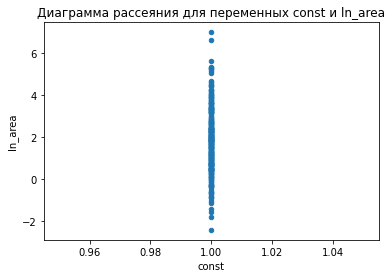

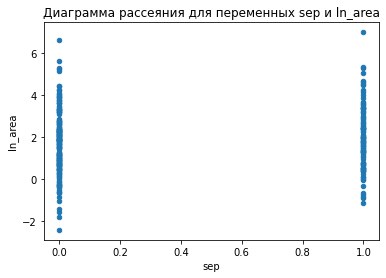

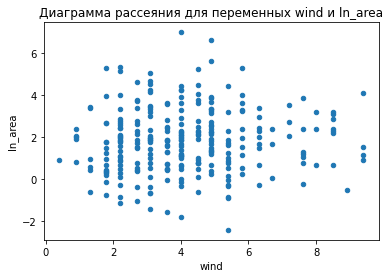

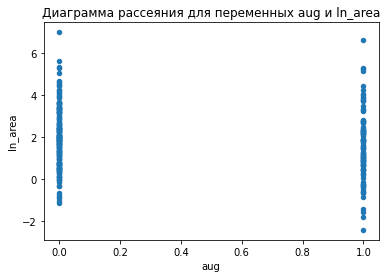

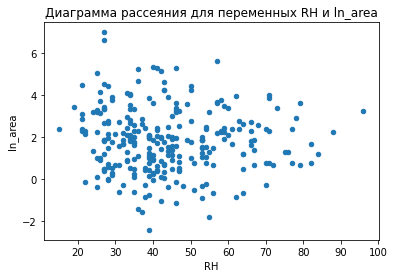

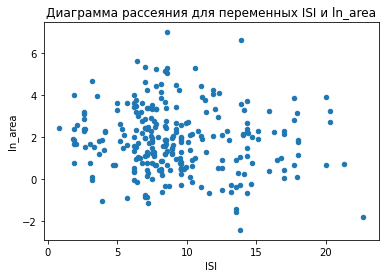

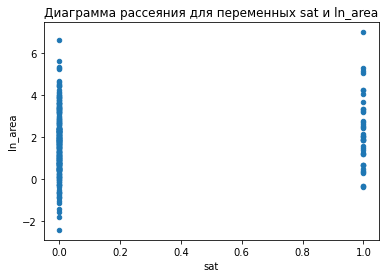

In [77]:
for i in ['const'] + columns_ind:
  df_new.plot(kind = 'scatter', x = i, y = 'ln_area', title = 'Диаграмма рассеяния для переменных ' + i + ' и ' + 'ln_area')

Исходя из этих диаграмм рассеяния можно предположить, что гетероскедастичность может быть связана с переменными wind и RH (в обоих случаях меньшим значениям этих переменных соответствуют более разные значения зависимой переменной ln_area).

Можно попытаться объяснить это следующим образом: когда значения показателя для ветра или относительной влажности низки, этот фактор не влияет на распространение пожара, поэтому его площадь определяется другими факторами, комбинация которых может дать как большую, так и маленькую площадь, в то время как большое значение скорости ветра способствует более быстрому распространению пожара, а большое значение относительной влажности - снижает возможность его распространения.

Такую зависимость, хотя и не в полной мере, можно наблюдать на диаграммах рассеяния.

# Задание 7

In [78]:
df_new['resid1_abs'] = np.abs(df_new['resid1'])
df_new.head()

,area,ln_area,const,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed,resid1,resid1_abs
138,0.36,-1.021651,1.0,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-2.890623,2.890623
139,0.43,-0.843970,1.0,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-2.751325,2.751325
140,0.47,-0.755023,1.0,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,-2.625964,2.625964
141,0.55,-0.597837,1.0,1,2,95.5,99.9,513.3,13.2,23.3,31,4.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-2.164167,2.164167
142,0.61,-0.494296,1.0,8,6,90.1,108.0,529.8,12.5,21.2,51,8.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.269446,2.269446


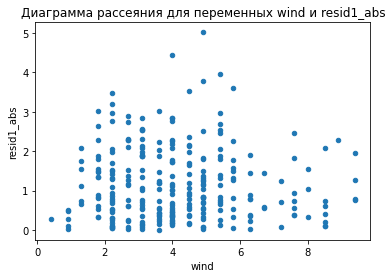

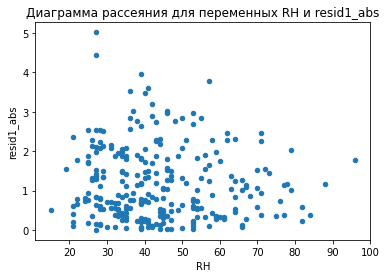

In [79]:
# Попытка выявить гетероскедастичность с помощью графика остатков

for i in ['wind', 'RH']:
  df_new.plot(kind = 'scatter', x = i, y = 'resid1_abs', title = 'Диаграмма рассеяния для переменных ' + i + ' и ' + 'resid1_abs')

Из этих графиков можно заключить, что предположение о гетероскедастичности, ассоциированной с этими факторами, в большей степени оправдано для относительной влажности, чем для скорости ветра.

Проведём тест Голфилда-Квандта.

In [80]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [81]:
# Проведём тесты на наличие гетероскедастичности отдельно в зависимости от каждой из двух выбранных переменнных

for i in ['wind', 'RH']:
  print(het_goldfeldquandt(y = df_new['ln_area'], x = df_new[['const'] + columns_ind].values,
      idx = 1 + columns_ind.index(i), split = 1 / 3, drop = 1 / 3, alternative = 'decreasing'))
  # print(columns_ind[columns_ind.index(i)])

  p_value = het_goldfeldquandt(y = df_new['ln_area'], x = df_new[['const'] + columns_ind].values,
      idx = 1 + columns_ind.index(i), split = 1 / 3, drop = 1 / 3, alternative = 'decreasing')[1]
  if p_value < alpha:
    print('p-value: ', p_value, '--> H_0 об одинаковости дисперсий для разных частей выборки', 'отвергается')
  else:
    print('p-value: ', p_value, '--> H_0 об одинаковости дисперсий для разных частей выборки', 'не отвергается')

(0.9826956948838991, 0.4684068662320985, 'decreasing')
p-value:  0.4684068662320985 --> H_0 об одинаковости дисперсий для разных частей выборки не отвергается
(0.8249766931992608, 0.19129934509647334, 'decreasing')
p-value:  0.19129934509647334 --> H_0 об одинаковости дисперсий для разных частей выборки не отвергается


Вывод: по результатам теста в модели нет проблемы гетероскедастичности, связанной с указанными переменными.

# Задание 8

Так как в предыдущем пункте p-value в тесте для проверки наличия гетероскедастичности в зависимости от RH меньше, чем от wind, будем использовать взвешенный МНК для случая, если бы была гетероскедастичность в зависимости от RH. Тогда $ \sigma_i \sim x_{ji} $, где j соответствует переменной RH. Тогда необходимо поделить каждую строку матриц X и y на $ x_{ji} $.

In [82]:
df_new.head()

,area,ln_area,const,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed,resid1,resid1_abs
138,0.36,-1.021651,1.0,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-2.890623,2.890623
139,0.43,-0.843970,1.0,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-2.751325,2.751325
140,0.47,-0.755023,1.0,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,-2.625964,2.625964
141,0.55,-0.597837,1.0,1,2,95.5,99.9,513.3,13.2,23.3,31,4.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-2.164167,2.164167
142,0.61,-0.494296,1.0,8,6,90.1,108.0,529.8,12.5,21.2,51,8.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.269446,2.269446


In [83]:
df_new.columns

Index(['area', 'ln_area', 'const', 'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI',
       'temp', 'RH', 'wind', 'aug', 'dec', 'feb', 'jul', 'jun', 'mar', 'may',
       'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'resid1',
       'resid1_abs'],
      dtype='object')

In [84]:
j = list(df_new.columns).index('RH')
j

10

In [85]:
df_new_weighted = df_new.values.copy()
df_new_weighted, df_new_weighted.shape

(array([[ 0.36      , -1.02165125,  1.        , ...,  0.        ,
         -2.89062266,  2.89062266],
        [ 0.43      , -0.84397007,  1.        , ...,  0.        ,
         -2.75132489,  2.75132489],
        [ 0.47      , -0.75502258,  1.        , ...,  0.        ,
         -2.62596354,  2.62596354],
        ...,
        [ 6.44      ,  1.86252854,  1.        , ...,  0.        ,
          0.07155916,  0.07155916],
        [54.29      ,  3.99434005,  1.        , ...,  0.        ,
          2.24434203,  2.24434203],
        [11.16      ,  2.41233596,  1.        , ...,  0.        ,
          0.58904788,  0.58904788]]), (270, 29))

In [86]:
for i in range(df_new_weighted.shape[0]):
  df_new_weighted[i] = df_new_weighted[i] / df_new_weighted[i, j]

df_new_weighted = pd.DataFrame(df_new_weighted, columns = df_new.columns)
df_new_weighted

,area,ln_area,const,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed,resid1,resid1_abs
0,0.008571,-0.024325,0.023810,0.214286,0.214286,2.042857,1.150000,7.461905,0.092857,0.428571,1.0,0.064286,0.000000,0.0,0.0,0.02381,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.023810,0.000000,-0.068824,0.068824
1,0.011316,-0.022210,0.026316,0.026316,0.105263,2.394737,3.407895,18.226316,0.184211,0.571053,1.0,0.057895,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.026316,0.000000,0.0,0.000000,0.0,0.026316,0.000000,-0.072403,0.072403
2,0.012051,-0.019360,0.025641,0.051282,0.128205,2.330769,3.243590,17.602564,0.179487,0.561538,1.0,0.046154,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.025641,0.025641,0.0,0.000000,0.0,0.000000,0.000000,-0.067332,0.067332
3,0.017742,-0.019285,0.032258,0.032258,0.064516,3.080645,3.222581,16.558065,0.425806,0.751613,1.0,0.145161,0.032258,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.032258,-0.069812,0.069812
4,0.011961,-0.009692,0.019608,0.156863,0.117647,1.766667,2.117647,10.388235,0.245098,0.415686,1.0,0.174510,0.019608,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.044499,0.044499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.030563,0.010912,0.014085,0.070423,0.056338,1.281690,2.350704,10.600000,0.100000,0.297183,1.0,0.107042,0.014085,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.013245,0.013245
266,0.006935,-0.013612,0.016129,0.096774,0.080645,1.467742,2.691935,12.138710,0.114516,0.293548,1.0,0.087097,0.016129,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.039662,0.039662
267,0.201250,0.058204,0.031250,0.125000,0.093750,2.550000,1.771875,20.800000,0.059375,0.868750,1.0,0.084375,0.031250,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031250,0.0,0.000000,0.000000,0.002236,0.002236
268,0.764648,0.056258,0.014085,0.028169,0.056338,1.149296,0.798592,9.374648,0.026761,0.308451,1.0,0.081690,0.014085,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.014085,0.0,0.000000,0.000000,0.031610,0.031610


Это преобразование эквивалентно следующему преобразованию в матрицах: $ \Omega^{- \frac{1}{2}} y = \Omega^{- \frac{1}{2}} X \beta + \Omega^{- \frac{1}{2}} \varepsilon $, где $ \Omega $ - матрица, пропорциональная ковариационной матрице $ \varepsilon $.

Проделаем это преобразование в матрицах.

In [87]:
omega = np.eye(N = df_new.shape[0])
omega = omega * df_new['RH'].values ** 2
# NB: это не матричное умножение, а поэлементное (построчное)

omega

array([[1764.,    0.,    0., ...,    0.,    0.,    0.],
       [   0., 1444.,    0., ...,    0.,    0.,    0.],
       [   0.,    0., 1521., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ..., 1024.,    0.,    0.],
       [   0.,    0.,    0., ...,    0., 5041.,    0.],
       [   0.,    0.,    0., ...,    0.,    0., 4900.]])

In [88]:
from scipy.linalg import fractional_matrix_power

In [89]:
new_omega = fractional_matrix_power(A = omega, t = - 1 / 2)
new_omega

# Возвели матрицу в степень - 1 / 2

array([[0.02380952, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02631579, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02564103, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.03125   , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01408451,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01428571]])

In [90]:
np.eye(N = df_new.shape[0]) / df_new['RH'].values

array([[0.02380952, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02631579, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02564103, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.03125   , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01408451,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01428571]])

In [91]:
new_omega == np.eye(N = df_new.shape[0]) / df_new['RH'].values

# получили матрицу Omega ^ (- 1 / 2) двумя способами, дающими результат,
# отличающийся на уровне погрешности при хранении действительнх чисел

array([[False,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True, False]])

In [92]:
df_new_weighted_1 = df_new.values.copy()
df_new_weighted_1 = new_omega @ df_new_weighted_1
df_new_weighted_1

array([[ 0.00857143, -0.02432503,  0.02380952, ...,  0.        ,
        -0.06882435,  0.06882435],
       [ 0.01131579, -0.02220974,  0.02631579, ...,  0.        ,
        -0.07240329,  0.07240329],
       [ 0.01205128, -0.01935955,  0.02564103, ...,  0.        ,
        -0.0673324 ,  0.0673324 ],
       ...,
       [ 0.20125   ,  0.05820402,  0.03125   , ...,  0.        ,
         0.00223622,  0.00223622],
       [ 0.76464789,  0.05625831,  0.01408451, ...,  0.        ,
         0.03161045,  0.03161045],
       [ 0.15942857,  0.03446194,  0.01428571, ...,  0.        ,
         0.00841497,  0.00841497]])

In [93]:
df_new_weighted_1 = pd.DataFrame(df_new_weighted_1, columns = df_new.columns)

df_new_weighted_1 - df_new_weighted

,area,ln_area,const,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed,resid1,resid1_abs
0,0.000000e+00,-3.469447e-18,3.469447e-18,2.775558e-17,2.775558e-17,4.440892e-16,2.220446e-16,8.881784e-16,0.000000e+00,5.551115e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,3.469447e-18,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,3.469447e-18,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,3.469447e-18,0.000000e+00,0.000000e+00,0.000000e+00,-4.440892e-16,-4.440892e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.938894e-18,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1.734723e-18,-3.469447e-18,3.469447e-18,6.938894e-18,2.775558e-17,4.440892e-16,4.440892e-16,3.552714e-15,2.775558e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,3.469447e-18,3.469447e-18,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,-1.387779e-17,1.387779e-17
3,3.469447e-18,-3.469447e-18,6.938894e-18,6.938894e-18,1.387779e-17,4.440892e-16,8.881784e-16,3.552714e-15,5.551115e-17,2.220446e-16,2.220446e-16,2.775558e-17,6.938894e-18,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,6.938894e-18,-1.387779e-17,1.387779e-17
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.776357e-15,0.000000e+00,5.551115e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,-1.734723e-18,1.734723e-18
266,1.734723e-18,-1.734723e-18,3.469447e-18,2.775558e-17,1.387779e-17,2.220446e-16,4.440892e-16,3.552714e-15,1.387779e-17,5.551115e-17,2.220446e-16,2.775558e-17,3.469447e-18,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,-6.938894e-18,6.938894e-18
267,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
268,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
# Получили в матричном виде DataFrame, который отличается от полученного циклом
# на уровне погрешности хранения в памяти действительных чисел

In [94]:
df_new_weighted_1.head()

,area,ln_area,const,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed,resid1,resid1_abs
0,0.008571,-0.024325,0.023810,0.214286,0.214286,2.042857,1.150000,7.461905,0.092857,0.428571,1.0,0.064286,0.000000,0.0,0.0,0.02381,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.023810,0.000000,-0.068824,0.068824
1,0.011316,-0.022210,0.026316,0.026316,0.105263,2.394737,3.407895,18.226316,0.184211,0.571053,1.0,0.057895,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.026316,0.000000,0.0,0.0,0.0,0.026316,0.000000,-0.072403,0.072403
2,0.012051,-0.019360,0.025641,0.051282,0.128205,2.330769,3.243590,17.602564,0.179487,0.561538,1.0,0.046154,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.025641,0.025641,0.0,0.0,0.0,0.000000,0.000000,-0.067332,0.067332
3,0.017742,-0.019285,0.032258,0.032258,0.064516,3.080645,3.222581,16.558065,0.425806,0.751613,1.0,0.145161,0.032258,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.032258,-0.069812,0.069812
4,0.011961,-0.009692,0.019608,0.156863,0.117647,1.766667,2.117647,10.388235,0.245098,0.415686,1.0,0.174510,0.019608,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.044499,0.044499


In [95]:
columns_ind_weighted = columns_ind.copy()
del columns_ind_weighted[columns_ind_weighted.index('RH')]

columns_ind_weighted, columns_ind

(['sep', 'wind', 'aug', 'ISI', 'sat'],
 ['sep', 'wind', 'aug', 'RH', 'ISI', 'sat'])

In [96]:
# Построим линейную модель на этом датасете

# После преобразования данных переменная 'RH' стала константной, поэтому не будем включать её в модель,
# так как она будет учтена в Intercept, которую в этой регрессии можно будет интерпретировать как 'RH'
# после преобразования

regressor_OLS = sm.ols('ln_area ~ ' + (' + ').join(['const'] + columns_ind_weighted), data = df_new_weighted_1).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_area   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     16.75
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.30e-16
Time:                        07:11:29   Log-Likelihood:                 480.47
No. Observations:                 270   AIC:                            -946.9
Df Residuals:                     263   BIC:                            -921.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0186      0.008     -2.376      0.018      -0.034      -0.003
const          2.3381      0.468      4.991      0.000       1.416       3.260
sep            0.3251      0.257      1.266      0.207      -0.180       0.831
wind           0.0833      0.051      1.635      0.103      -0.017       0.184
aug           -0.1570      0.294     -0.535      0.593      -0.735       0.421
ISI           -0.0219      0.027     -0.822      0.412      -0.074       0.031
sat            0.5740      0.257      2.236      0.026       0.068       1.079
==============================================================================
Omnibus:                       20.567   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.731
Skew:                           0.457   Prob(JB):                     2.87e-08
Kurtosis:                       4.501   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
del columns_ind_weighted

In [98]:
# Сравним результаты с изначальной регрессией

regressor_OLS = sm.ols('ln_area ~ ' + (' + ').join(columns_ind), data = df_new).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_area   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.008
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0649
Time:                        07:11:36   Log-Likelihood:                -490.81
No. Observations:                 270   AIC:                             995.6
Df Residuals:                     263   BIC:                             1021.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0859      0.438      4.760      0.000       1.223       2.949
sep            0.1476      0.245      0.601      0.548      -0.336       0.631
wind           0.0738      0.052      1.427      0.155      -0.028       0.176
aug           -0.2116      0.271     -0.782      0.435      -0.744       0.321
RH            -0.0069      0.006     -1.099      0.273      -0.019       0.005
ISI           -0.0322      0.026     -1.224      0.222      -0.084       0.020
sat            0.5036      0.255      1.978      0.049       0.002       1.005
==============================================================================
Omnibus:                        5.168   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                4.914
Skew:                           0.323   Prob(JB):                       0.0857
Kurtosis:                       3.142   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Новая оцененная модель имеет на один значимый коэффициент больше (в изначальной модели были значимы константа и коэффициент при sat, в новой модели - константа, коэффициент при sat и коэффициент при RH (все три переменные - преобразованные)), вся регрессия в целом стала значимой (p-value для F-теста стало почти 0), существенно увеличились $ R^2 $ и $ R_{adj}^2 $.

# Задание 9

In [99]:
# Пакетная реализация

regressor_OLS.HC0_se

Intercept    0.398963
sep          0.223273
wind         0.044021
aug          0.253850
RH           0.005775
ISI          0.024185
sat          0.275725
dtype: float64

Стандартные ошибки в форме Уайта используются в случае гетероскедастичности неизвестной формы. Идея их использования состоит в том, что если предполагать нулевое математическое ожидание возмущений в модели, т. е. $ E(u_i) = 0 $, то $ E(u_i^2) = \left( E(u_i) \right)^2 + Var(u_i) = 0^2 + \sigma^2 = \sigma^2 $, где $ Var(u_i) = \sigma^2 $, тогда $ \hat \sigma^2 = u_i^2 $ - несмещённая оценка для $ \sigma^2 $, также она будет состоятельной. Кроме того, поскольку обычно $ u_i $ неизвестны, используют $ \hat u_i $, которые получаются после оценивания модели.

Тогда получается, что оценка ковариационной матрицы $ \hat \Omega $ имеет диагональный вид (используется предположение о некоррелированности случайных возмущений), на главной диагонали расположены элементы $ \hat u_i^2 $.

Чтобы вывести оценку ковариационной матрицы для коэффициентов регрессии на имеющихся данных, получим её аналитически. $ Var(\hat \beta) = Var( \left( X^T X \right)^{-1} X^T y ) = \left( X^T X \right)^{-1} X^T Var( y ) X \left( X^T X \right)^{-1} = \left( X^T X \right)^{-1} X^T Var( X \beta + u ) X \left( X^T X \right)^{-1} = \left( X^T X \right)^{-1} X^T Var( u ) X \left( X^T X \right)^{-1} = \left( X^T X \right)^{-1} X^T \Omega X \left( X^T X \right)^{-1} $.

Тогда $ \widehat{Var}_{HC0} (\hat \beta) = \left( X^T X \right)^{-1} X^T \hat \Omega X \left( X^T X \right)^{-1} $.

In [ ]:
# Проверим, что при расчёте вручную получится такая же матрица, как и в пакетной реализации

In [100]:
hat_omega_hc0 = np.eye(N = df_new.shape[0]) * (df_new['resid1'].values ** 2)
hat_omega_hc0

array([[8.35569936e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.56978867e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.89568451e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.12071324e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.03707115e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.46977409e-01]])

In [101]:
X = df_new[['const'] + columns_ind].values
X

array([[ 1. ,  0. ,  2.7, ..., 42. ,  3.9,  0. ],
       [ 1. ,  1. ,  2.2, ..., 38. ,  7. ,  0. ],
       [ 1. ,  1. ,  1.8, ..., 39. ,  7. ,  0. ],
       ...,
       [ 1. ,  0. ,  2.7, ..., 32. ,  1.9,  0. ],
       [ 1. ,  0. ,  5.8, ..., 71. ,  1.9,  0. ],
       [ 1. ,  0. ,  6.7, ..., 70. ,  1.9,  0. ]])

In [102]:
hat_var_beta_hc0 = np.linalg.inv(X.T @ X) @ X.T @ hat_omega_hc0 @ X @ np.linalg.inv(X.T @ X)
hat_var_beta_hc0

array([[ 1.59171341e-01, -1.95562699e-02, -7.60359176e-03,
        -2.18674104e-03, -1.45125688e-03, -5.08689611e-03,
        -1.62884921e-02],
       [-1.95562699e-02,  4.98507558e-02,  2.45973281e-03,
         2.93361813e-02, -1.67285861e-04, -1.11278537e-03,
         6.99321064e-03],
       [-7.60359176e-03,  2.45973281e-03,  1.93787895e-03,
         2.72960401e-03, -4.64495855e-05, -3.43770813e-05,
         1.08567945e-03],
       [-2.18674104e-03,  2.93361813e-02,  2.72960401e-03,
         6.44400530e-02, -2.74564342e-04, -2.91566040e-03,
        -5.99467906e-03],
       [-1.45125688e-03, -1.67285861e-04, -4.64495855e-05,
        -2.74564342e-04,  3.33493751e-05,  3.10052744e-05,
        -2.10998287e-06],
       [-5.08689611e-03, -1.11278537e-03, -3.43770813e-05,
        -2.91566040e-03,  3.10052744e-05,  5.84924240e-04,
         2.13436493e-04],
       [-1.62884921e-02,  6.99321064e-03,  1.08567945e-03,
        -5.99467906e-03, -2.10998287e-06,  2.13436493e-04,
         7.6024369

In [103]:
np.diagonal(hat_var_beta_hc0)

array([1.59171341e-01, 4.98507558e-02, 1.93787895e-03, 6.44400530e-02,
       3.33493751e-05, 5.84924240e-04, 7.60243695e-02])

In [104]:
hat_se_beta_hc0 = np.sqrt(np.diagonal(hat_var_beta_hc0))
hat_se_beta_hc0

array([0.39896283, 0.22327283, 0.04402135, 0.25385045, 0.00577489,
       0.02418521, 0.27572517])

In [105]:
# Проверим, совпадают ли оценки, полученные с помощью модели и вручную
print(regressor_OLS.HC0_se.values)
print(hat_se_beta_hc0)

hat_se_beta_hc0 - regressor_OLS.HC0_se

# Отличия между двумя способами получились на уровне погрешности вычислений
# и хранения вещественных чисел в памяти

[0.39896283 0.22327283 0.04402135 0.25385045 0.00577489 0.02418521
 0.27572517]
[0.39896283 0.22327283 0.04402135 0.25385045 0.00577489 0.02418521
 0.27572517]


Intercept    3.330669e-16
sep          1.110223e-16
wind        -6.245005e-17
aug          5.551115e-17
RH          -2.081668e-17
ISI         -1.422473e-16
sat          5.551115e-17
dtype: float64

Что касается p-value, то, поскольку стандартные ошибки в форме Уайта не использовались при оценивании линейной модели, более того, в данном случае использовали результаты её оценивания, сами значения коэффициентов не поменялись, однако получились другие стандартные ошибки, из-за этого получаются другие t-статистики и другие p-value. Рассчитаем их.

In [106]:
t_stats_hc0 = regressor_OLS.params / regressor_OLS.HC0_se
t_stats_hc0

Intercept    5.228348
sep          0.660853
wind         1.675378
aug         -0.833602
RH          -1.197064
ISI         -1.333028
sat          1.826591
dtype: float64

In [107]:
abs_t_stats_hc0 = np.abs(t_stats_hc0)
abs_t_stats_hc0

Intercept    5.228348
sep          0.660853
wind         1.675378
aug          0.833602
RH           1.197064
ISI          1.333028
sat          1.826591
dtype: float64

In [108]:
p_values_hc0 = 2 * (1 - t.cdf(x = abs_t_stats_hc0, df = regressor_OLS.df_resid))
p_values_hc0

array([3.49036961e-07, 5.09284977e-01, 9.50486462e-02, 4.05261628e-01,
       2.32359404e-01, 1.83676296e-01, 6.88948436e-02])

In [109]:
p_values_hc0 = pd.DataFrame(p_values_hc0, index = abs_t_stats_hc0.index)
p_values_hc0

,0
Intercept,3.490370e-07
sep,5.092850e-01
wind,9.504865e-02
aug,4.052616e-01
RH,2.323594e-01
ISI,1.836763e-01
sat,6.889484e-02


In [110]:
p_values_hc0 < alpha

,0
Intercept,True
sep,False
wind,False
aug,False
RH,False
ISI,False
sat,False


Значимость коэффициентов изменилась, теперь при уровне значимости 5% значимым является только коэффициент при константе (при использовании стандартных ошибок в форме по умолчанию также значимым был коэффициент при sat).

Проделаем аналогичные расчёты для стандартных ошибок в форме HC3.

Отличие этих стандартных ошибок от стандартных ошибок в форме HC0 состоит в том, что вместо $ \hat u_i^2 $ в качестве оценок дисперсий случайных колебаний используется $ \hat u_{i CV}^2 $, где под $ \hat u_{i CV} $ понимается разница между истинным значением зависимой переменной для $ i $-го наблюдения и прогнозом для него из регрессии, построенной по всем наблюдениям, кроме $ i $-го.

In [111]:
# Пакетная реализация

regressor_OLS.HC3_se

Intercept    0.415074
sep          0.229181
wind         0.045497
aug          0.261009
RH           0.006006
ISI          0.025179
sat          0.286400
dtype: float64

In [ ]:
# Расчёт вручную

In [112]:
%%time

resid1_cv = []

for i in df_new.index:
  df_temporary = df_new.copy()
  current_row = df_temporary.loc[i][['const'] + columns_ind].copy()
  # print(current_row)

  df_temporary.drop(index = i, inplace = True)

  regressor_OLS = sm.ols('ln_area ~ ' + (' + ').join(columns_ind), data = df_temporary).fit()
  # regressor_OLS.summary()

  current_prediction = regressor_OLS.predict(exog = current_row).values[0]
  # print(current_prediction)
  resid1_cv.append(df_new['ln_area'][i] - current_prediction)

print(type(resid1_cv), type(resid1_cv[0]), resid1_cv)

<class 'list'> <class 'numpy.float64'> [-2.9531907976162746, -2.789775928111915, -2.6660630834624195, -2.195558304840042, -2.353670552143294, -2.7882832432906755, -1.9172474834531064, -1.8255567659728378, -2.0910343570157552, -2.299977594572006, -1.4913151228204369, -1.7718401041778418, -1.8396209169911353, -1.5466375890456376, -1.9488434687714127, -1.420809618993186, -2.185940016727272, -0.6744894502395273, -2.0475937950847007, -1.0438192156902304, -1.1396258057630155, -1.539825670645222, -1.3837373865902958, -0.9196400015953395, -2.216287544678743, -1.5984306375076645, -1.1080398077979146, -1.1064608097069404, -0.48963132643236784, -0.5356549005735994, -1.3354868490995455, -0.4613963960806292, -0.8977397821941554, -0.6332738699801683, -0.6627208891413015, -0.7895526735042973, -0.6278361524215956, -0.6962189113672685, -0.5364468897662875, -0.021181831724852884, -0.30394752581359485, 0.13097947045678437, -0.5734194257235206, -0.3777868413838914, 0.09961013586681, 0.17599501967226505, 0

In [113]:
resid1_cv = pd.DataFrame(resid1_cv, index = df_new.index, columns = ['resid1_cv'])
resid1_cv

,resid1_cv
138,-2.953191
139,-2.789776
140,-2.666063
141,-2.195558
142,-2.353671
...,...
509,-0.978302
510,-2.515497
512,0.075029
513,2.361270


In [114]:
df_new = pd.concat((df_new, resid1_cv), axis = 1)
df_new.head()

,area,ln_area,const,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,aug,dec,feb,jul,jun,mar,may,oct,sep,mon,sat,sun,thu,tue,wed,resid1,resid1_abs,resid1_cv
138,0.36,-1.021651,1.0,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-2.890623,2.890623,-2.953191
139,0.43,-0.843970,1.0,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-2.751325,2.751325,-2.789776
140,0.47,-0.755023,1.0,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,-2.625964,2.625964,-2.666063
141,0.55,-0.597837,1.0,1,2,95.5,99.9,513.3,13.2,23.3,31,4.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-2.164167,2.164167,-2.195558
142,0.61,-0.494296,1.0,8,6,90.1,108.0,529.8,12.5,21.2,51,8.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.269446,2.269446,-2.353671


In [ ]:
# Далее используем немного отредактированный код из раздела с HC0 без подробных пояснений
# и просмотра промежуточных результатов

In [115]:
hat_omega_hc3 = np.eye(N = df_new.shape[0]) * (df_new['resid1_cv'].values ** 2)
hat_var_beta_hc3 = np.linalg.inv(X.T @ X) @ X.T @ hat_omega_hc3 @ X @ np.linalg.inv(X.T @ X)
hat_se_beta_hc3 = np.sqrt(np.diagonal(hat_var_beta_hc3))

regressor_OLS = sm.ols('ln_area ~ ' + (' + ').join(columns_ind), data = df_new).fit()
# regressor_OLS.summary()

# Проверим, совпадают ли оценки, полученные с помощью модели и вручную
print(regressor_OLS.HC3_se.values)
print(hat_se_beta_hc3)

print(hat_se_beta_hc3 - regressor_OLS.HC3_se)

# Отличия между двумя способами получились на уровне погрешности вычислений
# и хранения вещественных чисел в памяти

t_stats_hc3 = regressor_OLS.params / regressor_OLS.HC3_se
abs_t_stats_hc3 = np.abs(t_stats_hc3)
p_values_hc3 = 2 * (1 - t.cdf(x = abs_t_stats_hc3, df = regressor_OLS.df_resid))
p_values_hc3 = pd.DataFrame(p_values_hc3, index = abs_t_stats_hc3.index)
print(p_values_hc3)
print('')

p_values_hc3 < alpha

[0.41507433 0.22918137 0.04549697 0.26100923 0.00600646 0.02517851
 0.28639983]
[0.41507433 0.22918137 0.04549697 0.26100923 0.00600646 0.02517851
 0.28639983]
Intercept   -5.551115e-17
sep          1.387779e-16
wind        -9.714451e-17
aug          5.551115e-17
RH          -2.168404e-17
ISI         -1.595946e-16
sat         -1.110223e-16
dtype: float64
                      0
Intercept  9.293830e-07
sep        5.202561e-01
wind       1.062075e-01
aug        4.182488e-01
RH         2.508128e-01
ISI        2.015189e-01
sat        7.982381e-02



,0
Intercept,True
sep,False
wind,False
aug,False
RH,False
ISI,False
sat,False


Как и в случае с оценками HC0, в отличие от изначальной модели изменившиеся p-value таковы, что при уровне значимости 5% значимым является только коэффициент при константе.

# Задание 10

In [116]:
from sklearn.decomposition import PCA

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [117]:
X = df_new[['const'] + columns_ind].copy()
X = X.values
X

array([[ 1. ,  0. ,  2.7, ..., 42. ,  3.9,  0. ],
       [ 1. ,  1. ,  2.2, ..., 38. ,  7. ,  0. ],
       [ 1. ,  1. ,  1.8, ..., 39. ,  7. ,  0. ],
       ...,
       [ 1. ,  0. ,  2.7, ..., 32. ,  1.9,  0. ],
       [ 1. ,  0. ,  5.8, ..., 71. ,  1.9,  0. ],
       [ 1. ,  0. ,  6.7, ..., 70. ,  1.9,  0. ]])

In [118]:
pca = PCA()

In [119]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [120]:
pca.n_components_, pca.components_

(7, array([[ 0.00000000e+00, -1.91442533e-03,  1.74147208e-02,
          6.54483398e-04,  9.98874499e-01, -4.40695881e-02,
         -4.89820721e-04],
        [-0.00000000e+00, -2.08634943e-02,  5.53717786e-02,
          5.80208403e-02,  4.28831124e-02,  9.95636986e-01,
         -5.41177188e-04],
        [ 0.00000000e+00, -5.15008907e-02,  9.96750281e-01,
         -1.25688644e-02, -1.98997063e-02, -5.49321868e-02,
         -1.62793312e-02],
        [ 0.00000000e+00,  7.60839016e-01,  3.32546734e-02,
         -6.43971762e-01,  3.54461561e-03,  5.14406949e-02,
         -5.15730509e-02],
        [-0.00000000e+00,  3.59481773e-02,  1.78472343e-02,
         -3.63800534e-02,  3.77437982e-04,  2.40727100e-03,
          9.98528797e-01],
        [ 0.00000000e+00, -6.45554358e-01, -4.11724998e-02,
         -7.61874031e-01,  1.43805155e-03,  3.30964889e-02,
         -3.86159637e-03],
        [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e

In [121]:
# Преобразование независимых переменных

fitted_components = pca.transform(X)
fitted_components.shape, fitted_components

((270, 7), array([[ -1.52290798,  -5.42027697,  -1.05835613, ...,  -0.19347703,
           0.39290708,   0.        ],
        [ -5.66564349,  -2.55388415,  -1.69892311, ...,  -0.16049968,
          -0.13521412,   0.        ],
        [ -4.67373488,  -2.53314975,  -2.11752293, ...,  -0.16726114,
          -0.11730707,   0.        ],
        ...,
        [-11.42285932,  -7.78236123,  -0.76206355, ...,  -0.238446  ,
          -0.44954044,   0.        ],
        [ 27.5872318 ,  -5.93826733,   1.55177377, ...,  -0.1683995 ,
          -0.52109118,   0.        ],
        [ 26.60403055,  -5.93131584,   2.46874873, ...,  -0.15271442,
          -0.55958448,   0.        ]]))

In [122]:
print(pca.explained_variance_ratio_)

# Проверим, что эти доли объяснённой дисперсии в сумме равны 1
np.sum(pca.explained_variance_ratio_)

[9.16111239e-01 6.79125971e-02 1.38794051e-02 1.25264855e-03
 5.24309261e-04 3.19801502e-04 0.00000000e+00]


1.0

In [123]:
# Доля дисперсии, которую объясняют первые 2 главные компоненты

np.sum(pca.explained_variance_ratio_[:2])

0.9840238355934604

In [124]:
df_pca = pd.DataFrame(fitted_components, columns = ['Z_' + str(i + 1) for i in range(fitted_components.shape[1])],
                      index = df_new.index)
df_pca['ln_area'] = df_new['ln_area'].copy()
df_pca

,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,ln_area
138,-1.522908,-5.420277,-1.058356,-0.353779,-0.193477,0.392907,0.0,-1.021651
139,-5.665643,-2.553884,-1.698923,0.535720,-0.160500,-0.135214,0.0,-0.843970
140,-4.673735,-2.533150,-2.117523,0.525963,-0.167261,-0.117307,0.0,-0.755023
141,-12.888374,3.525123,0.431253,-0.498485,-0.179496,-0.151099,0.0,-0.597837
142,7.196590,3.929475,4.457413,-0.317280,-0.095105,-0.326664,0.0,-0.494296
...,...,...,...,...,...,...,...,...
509,27.389416,-0.661286,3.060277,-0.567399,-0.123757,-0.423100,0.0,0.774727
510,18.361234,-1.169052,1.046524,-0.672461,-0.166418,-0.345463,0.0,-0.843970
512,-11.422859,-7.782361,-0.762064,-1.136078,-0.238446,-0.449540,0.0,1.862529
513,27.587232,-5.938267,1.551774,-0.894749,-0.168399,-0.521091,0.0,3.994340


In [125]:
# Регрессия зависимой переменной на первые 2 главные компоненты

regressor_OLS = sm.ols('ln_area ~ ' + 'Z_1 + Z_2', data = df_pca).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_area   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.214
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.111
Time:                        07:15:46   Log-Likelihood:                -494.63
No. Observations:                 270   AIC:                             995.3
Df Residuals:                     267   BIC:                             1006.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8448      0.092     19.945      0.000       1.663       2.027
Z_1           -0.0049      0.006     -0.793      0.429      -0.017       0.007
Z_2           -0.0439      0.023     -1.949      0.052      -0.088       0.000
==============================================================================
Omnibus:                        5.540   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.247
Skew:                           0.326   Prob(JB):                       0.0726
Kurtosis:                       3.205   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Из результатов оценивания регрессии можно заключить, что объясняющая способность модели по сравнению с исходной линейной не повысилась (у изначальной модели были выше и $ R^2 $, и $ R_{adj}^2 $: у исходной модели они равны 0.044 и 0.022 соответственно, у этой модели они равны 0.016 и 0.009 соответственно). Это можно объяснить тем, что при проецировании признаков в пространство меньшей размерности, хотя это делается так, чтобы дисперсия ыла максимальной, часть содержащейся в этих признаках информации всё равно теряется; кроме того, здесь использованы не все полученные главные компоненты, а только первые две из них.

Коэффициенты перед обеими главными компонентами в этой модели оказались не значимыми, значим только коэффициент при константе.

In [ ]:
# Оценим эту модель без константы, только с первыми двумя главными компонентами

In [126]:
from statsmodels.regression.linear_model import OLS

In [127]:
model = OLS(endog = df_pca['ln_area'], exog = df_pca[['Z_1', 'Z_2']])
results = model.fit()

print('coefficient estimates:')
print(results.params)
print('')
print('p-values:')
print(results.pvalues)

coefficient estimates:
Z_1   -0.004868
Z_2   -0.043940
dtype: float64

p-values:
Z_1    0.615050
Z_2    0.217014
dtype: float64


В модели без константы оба коэффициента также оказались не значимыми.

# Задание 11

Решим сначала задачу нахождения оценок методом максимального правдоподобия аналитически (решение этой задачи есть в слайдах лекции 2 модуля 3).

$ L = \left( \frac{1}{\sqrt{2 \pi \sigma^2}} \right)^n e^{- \frac{1}{2 \sigma^2} \varepsilon^T \varepsilon} =
\left( \frac{1}{\sqrt{2 \pi \sigma^2}} \right)^n e^{- \frac{1}{2 \sigma^2} \left( Y - X \beta \right)^T \left( Y - X \beta \right)} $

$ l = \ln(L) = - \frac{n}{2} (\ln(2 \pi) + \ln(\sigma^2) ) - \frac{1}{2 \sigma^2} \left( Y - X \beta \right)^T \left( Y - X \beta \right) $

Найдём дифференциал функции $ l $ по вектору коэффициентов $ \beta $: $ dl =
- \frac{1}{2 \sigma^2} \left( - X d \beta \right)^T \left( Y - X \beta \right) - \frac{1}{2 \sigma^2} \left( Y - X \beta \right)^T \left( - X d \beta \right) =
\frac{1}{2 \sigma^2} d \beta^T X^T \left( Y - X \beta \right) + \frac{1}{2 \sigma^2} \left( Y - X \beta \right)^T X d \beta =
\frac{1}{2 \sigma^2} d \beta^T X^T \left( Y - X \beta \right) + \frac{1}{2 \sigma^2} \left( d \beta^T X^T \left( Y - X \beta \right) \right)^T = 
\frac{1}{\sigma^2} d \beta^T X^T \left( Y - X \beta \right) $,

так как $ d \beta^ T X^T \left( Y - X \beta \right) $ и $ \left( Y - X \beta \right)^T X d \beta $ имеют размерность $ 1 \times 1 $.

$ FOC: d l = 0, \forall d \beta $, тогда $ X^T \left( Y - X \hat \beta_{ML} \right) = 0 $, откуда $ \hat \beta_{ML} = \left( X^T X \right)^{-1} X^T Y = \hat \beta_{OLS} $.

Найдём $ \hat \sigma^2 $:

$ \frac{\partial l}{\partial \sigma^2} = - \frac{n}{2} \frac{1}{\sigma^2} + \frac{1}{2 (\sigma^2)^2} \left( Y - X \beta \right)^T \left( Y - X \beta \right) $

$ FOC: \frac{\partial l}{\partial \sigma^2} = 0 $ при $ \sigma^2 = \hat \sigma^2 $, $ \beta = \hat \beta $, откуда $ - n \hat \sigma^2 + RSS = 0 $, откуда $ \hat \sigma_{ML}^2 = \frac{RSS}{n} \neq \hat \sigma_{OLS}^2 = \frac{RSS}{n - k} $

In [128]:
X = df_new[['const'] + columns_ind].values.copy()
y = df_new['ln_area'].values.copy()

In [129]:
X.shape, y.shape

((270, 7), (270,))

In [130]:
# Важно

y = np.array(y).reshape(df_new.shape[0], 1)
y.shape

(270, 1)

In [131]:
hat_beta_ml = np.linalg.inv(X.T @ X) @ X.T @ y
hat_beta_ml

array([[ 2.08591672],
       [ 0.14755054],
       [ 0.07375238],
       [-0.21161029],
       [-0.00691292],
       [-0.03223955],
       [ 0.50363698]])

In [132]:
# Проверим, что найденные коэффициенты совпадают с коэффициентами, полученными с помощью МНК

regressor_OLS = sm.ols('ln_area ~ ' + (' + ').join(columns_ind), data = df_new).fit()
# regressor_OLS.summary()
regressor_OLS.params

Intercept    2.085917
sep          0.147551
wind         0.073752
aug         -0.211610
RH          -0.006913
ISI         -0.032240
sat          0.503637
dtype: float64

In [133]:
regressor_OLS.params.values - hat_beta_ml.reshape(-1,)

# Отличия в оценках лежат в пределах погрешностей вычисления и хранения вещественных чисел в памяти

array([-3.55271368e-15,  5.52335955e-15,  9.57567359e-16,  5.10702591e-15,
       -5.72458747e-17, -3.05311332e-16,  3.33066907e-16])

In [134]:
# Найдём оценку дисперсии случайных колебаний, плученную методом максимального правдоподобия

# regressor_OLS.scale # МНК-оценка дисперсии

print(regressor_OLS.df_resid)

hat_standard_error_sq_ml = regressor_OLS.scale * regressor_OLS.df_resid / df_new.shape[0]
hat_standard_error_sq_ml

263.0


2.22047927934861

Найдём теперь решение с помощью градиентного спуска

In [146]:
epsilon = 1 / 10 ** 4 # Нужно для критерия останова
learning_rate = 1 / 10 ** 4
n = df_new.shape[0]
k = len(['const'] + columns_ind)

def function_l(beta, sigma_2):
  value = - n / 2 * (np.log(2 * np.pi) + np.log(sigma_2)) - (1 / (2 * sigma_2)) * (y - X @ beta).T @ (y - X @ beta)
  return value[0][0]

def grad_l_beta(beta, sigma_2):
  return (1 / sigma_2) * X.T @ (y - X @ beta)

def grad_l_sigma_2(beta, sigma_2):
  value = - n / (2 * sigma_2) + (1 / (2 * (sigma_2)**2)) * (y - X @ beta).T @ (y - X @ beta)
  return value[0][0]

  # NB: it is important to use **2 instead of ^2 so as not to get an error
  # "TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''"
  # see https://stackoverflow.com/questions/22725421/typeerror-with-ufunc-bitwise-xor

In [147]:
np.random.seed(10)

beta = np.random.randn(k, 1)
sigma_2 = np.random.randint(low = 1, high = 10, size = 1)[0]

print(beta, sigma_2)
print(beta.shape)
beta

[[ 1.3315865 ]
 [ 0.71527897]
 [-1.54540029]
 [-0.00838385]
 [ 0.62133597]
 [-0.72008556]
 [ 0.26551159]] 7
(7, 1)


array([[ 1.3315865 ],
       [ 0.71527897],
       [-1.54540029],
       [-0.00838385],
       [ 0.62133597],
       [-0.72008556],
       [ 0.26551159]])

In [148]:
previous_value = function_l(beta = np.zeros(shape = (k, 1)), sigma_2 = 1)
previous_value.shape, previous_value

((), -1021.072041330739)

In [149]:
np.zeros(shape = (k, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [150]:
function_l(beta = beta, sigma_2 = sigma_2)

-6415.515977718314

In [151]:
grad_l_beta(beta, sigma_2).shape, grad_l_sigma_2(beta, sigma_2).shape, grad_l_sigma_2(beta, sigma_2)

((7, 1), (), 824.2435290900835)

In [152]:
grad_l_beta(beta, sigma_2)

array([[  -539.63823737],
       [  -207.45264905],
       [ -2074.88912106],
       [  -175.42042543],
       [-29084.29635119],
       [ -4238.3161513 ],
       [   -83.58977101]])

In [153]:
n_steps = 0

# NB: максимизируем здесь лог-правдоподобие, поэтому делаем шаг в сторону градиента,
# а не в противоположную сторону (т. е. поэтому используем + ..., а не - ...)

while np.abs(function_l(beta, sigma_2) - previous_value) >= epsilon:
  
  previous_value = function_l(beta = beta, sigma_2 = sigma_2)

  beta = beta + learning_rate * grad_l_beta(beta, sigma_2)

  if grad_l_sigma_2(beta, sigma_2) <= 100 and sigma_2 + learning_rate * grad_l_sigma_2(beta, sigma_2) > 0:
    sigma_2 = sigma_2 + learning_rate * grad_l_sigma_2(beta, sigma_2)
  else:
    sigma_2 = sigma_2 + learning_rate * grad_l_sigma_2(beta, sigma_2) / 10**3
                                                              # something like gradient clipping
  n_steps += 1


print(beta)
print(sigma_2)
print(n_steps)

[[ 1.73357249]
 [ 0.29457295]
 [ 0.09398727]
 [-0.10048076]
 [-0.00566419]
 [-0.02787075]
 [ 0.50823679]]
29.46771121836126
21298


In [154]:
print(np.abs(function_l(beta, sigma_2) - previous_value) >= epsilon)
print(np.abs(function_l(beta, sigma_2) - previous_value))
print(function_l(beta, sigma_2))
print(previous_value)

False
1.5711324863332266e-05
-715.0839818180295
-715.0839975293544


In [155]:
hat_beta_ml.shape, beta.shape

((7, 1), (7, 1))

In [156]:
# Сравним коэффициенты, полученные двумя способами

coeffs_ml = pd.DataFrame(np.hstack((hat_beta_ml, beta)), index = regressor_OLS.params.index, columns = ['ML', 'ML_numerical'])
coeffs_ml

,ML,ML_numerical
Intercept,2.085917,1.733572
sep,0.147551,0.294573
wind,0.073752,0.093987
aug,-0.211610,-0.100481
RH,-0.006913,-0.005664
ISI,-0.032240,-0.027871
sat,0.503637,0.508237


Вывод по этой части: использование численных методов помогло получить примерно похожие на правильные оценки коэффициентов регрессии, но оценка дисперсии случайных колебаний далека от верной и отличается (в большую сторону) более чем в 10 раз.

In [157]:
# Посмотрим на значение лог-правдоподобия в точке с подобранными коэффициентами
# и верным значением оценки дисперсии случайных колебаний

function_l(beta = beta, sigma_2 = hat_standard_error_sq_ml)

-491.51051257373524